In [19]:
#Import Library
from skimage.feature import graycomatrix, graycoprops
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import time
import pyfeats

In [20]:
def TemplateMatching(img, template):
    if len(img.shape) == 3:  # Color image
        imgGGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif len(img.shape) == 2:  # Grayscale image
        imgGGray = img
 
    templateMatch = cv2.imread(template, cv2.IMREAD_GRAYSCALE)

    w, h = templateMatch.shape[::-1]
    res = cv2.matchTemplate(imgGGray, templateMatch, cv2.TM_CCOEFF_NORMED ) 

    threshold = 0.8
    
    loc = np.where(res >= threshold)

    ij = np.unravel_index(np.argmax(res), res.shape)
    x, y = ij[::-1]
    max_corr = np.min(res)

    imgGoodCrop = img[y: y + h, x:x+w]
    
    return imgGoodCrop

def GLCMFeatureImage(img):
    if len(img.shape) == 3:  # Color image
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif len(img.shape) == 2:  # Grayscale image
        gray_image = img
    
    # H, labels = pyfeats.histogram(img, img, bins=256)
    
    # mean = np.mean(H)
    # kurtosis = np.mean((H - mean) ** 4)

    distances = [1]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    

    # Compute the GLCM
    glcm = graycomatrix(gray_image, distances=distances, angles=angles, symmetric=True, normed=True)

    # Extract specific features from GLCM
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    energy = graycoprops(glcm, 'energy')
    homogeneity = graycoprops(glcm, 'homogeneity')
    contrast = graycoprops(glcm, 'contrast')
    correlation = graycoprops(glcm, 'correlation')
    
    glcm_analysis = [dissimilarity.flatten(), energy.flatten(), homogeneity.flatten(), contrast.flatten(), correlation.flatten()]
    glcm_analysis = np.concatenate(glcm_analysis)

    return glcm_analysis

def HistAnalysis(img):
    hist, bins = np.histogram(img, bins=10, range=(245, 255))
    
    return hist

def GLCMFeaturesLabel():
    header = np.array([['number', 'Filename', 'category','class','duration',
                        'Dissimilarity 0', 'Dissimilarity 45', 'Dissimilarity 90', 'Dissimilarity 135',
                        'Energy 0', 'Energy 45', 'Energy 90', 'Energy 135',
                        'Homogeneity 0', 'Homogeneity 45', 'Homogeneity 90', 'Homogeneity 135',
                        'Contrast 0', 'Contrast 45', 'Contrast 90', 'Contrast 135',
                        'Correlation 0', 'Correlation 45', 'Correlation 90', 'Correlation 135']])
    
    LabelFeatures = np.vstack([header])
    
    return LabelFeatures

def HistFeaturesLabel():
    Hist = np.array([['number', 'Filename', 'category','class','duration']])
    
    for i in range(245, 255):
        Hist = np.append(Hist, f'Histogram {i}')

    LabelFeatures = np.vstack([Hist])
    
    return LabelFeatures

def ImageFeature(img):
    if len(img.shape) == 3:  # Color image
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif len(img.shape) == 2:  # Grayscale image
        gray_image = img
    
    # H, labels = pyfeats.histogram(img, img, bins=256)
    
    # mean = np.mean(H)
    # kurtosis = np.mean((H - mean) ** 4)

    distances = [1]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    

    # Compute the GLCM
    glcm = graycomatrix(gray_image, distances=distances, angles=angles, symmetric=True, normed=True)

    # Extract specific features from GLCM
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    energy = graycoprops(glcm, 'energy')
    homogeneity = graycoprops(glcm, 'homogeneity')
    contrast = graycoprops(glcm, 'contrast')
    correlation = graycoprops(glcm, 'correlation')
    
    feature_analysis = [dissimilarity.flatten(), energy.flatten(), homogeneity.flatten(), contrast.flatten(), correlation.flatten()]
    feature_analysis = np.concatenate(feature_analysis)
    
    hist, bins = np.histogram(img, bins=35, range=(220, 255))
    feature_analysis = np.append(feature_analysis, hist)
    
    return feature_analysis
    

def FeaturesLabel():
    header = np.array([['number', 'Filename', 'category','class','duration',
                        'Dissimilarity 0', 'Dissimilarity 45', 'Dissimilarity 90', 'Dissimilarity 135',
                        'Energy 0', 'Energy 45', 'Energy 90', 'Energy 135',
                        'Homogeneity 0', 'Homogeneity 45', 'Homogeneity 90', 'Homogeneity 135',
                        'Contrast 0', 'Contrast 45', 'Contrast 90', 'Contrast 135',
                        'Correlation 0', 'Correlation 45', 'Correlation 90', 'Correlation 135']])
    
    for i in range(220, 255):
        header = np.append(header, f'Histogram {i}')
    
    LabelFeatures = np.vstack([header])
    
    return LabelFeatures

def ImageBrightened(img):
    brightness_factor = 1.5  # You can adjust this value to control brightness
    
    brightened_image = cv2.convertScaleAbs(img, alpha=brightness_factor, beta=0.5)
    
    return brightened_image

def ContrastedImage(img):
    contrast_factor = 1.1  # You can adjust this value to control contrast
    
    contrasted_image = np.clip(contrast_factor * img, 0, 255).astype(np.uint8)
    
    return contrasted_image

In [21]:
def Thresholding(img):
    image_gray = img
    threshold_value = 80
    image_gray[image_gray > threshold_value] = 255
    
    #image_gray[image_gray < threshold_value] = 0
    
    return image_gray

## Histogram Analysis

In [22]:
#Get the Feature Data
def getDataFeature():
  dtFeature = HistFeaturesLabel()
  
  directory = "CAMERA 4_OZ/"
  subpath = "good_cropped_png/"
  newDirectory = directory + subpath
  number = 1
  category = "good"
  classData = 0

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        # thresholded = Thresholding(image)
        featureImage = HistAnalysis(image)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")

  directory = "CAMERA 4_OZ/"
  subpath = "color tone_cropped_png/"
  newDirectory = directory + subpath
  number = 1
  category = "reject"
  classData = 1

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        # thresholded = Thresholding(image)
        featureImage = HistAnalysis(image)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1

        print(f"{number} {nameFile}")
 
  return dtFeature

In [23]:
FeatureData = getDataFeature()
good_df = pd.DataFrame(FeatureData)
good_csv = 'OZ_All file Histogram Analysis_Full Image ROI.csv'
good_df.to_csv(good_csv, index=False,header=False)

2 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1.png
3 CAMERA 4_OZ/good_cropped_png/OZ_Cropped10.png
4 CAMERA 4_OZ/good_cropped_png/OZ_Cropped100.png
5 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1000.png
6 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1001.png
7 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1002.png
8 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1003.png
9 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1004.png
10 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1005.png
11 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1006.png
12 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1007.png
13 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1008.png
14 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1009.png
15 CAMERA 4_OZ/good_cropped_png/OZ_Cropped101.png
16 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1010.png
17 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1011.png
18 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1012.png
19 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1013.png
20 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1014.png
21 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1015

   number                                         Filename category  class  \
0       1     CAMERA 4_OZ/good_cropped_png/OZ_Cropped1.png     good      0   
1       2    CAMERA 4_OZ/good_cropped_png/OZ_Cropped10.png     good      0   
2       3   CAMERA 4_OZ/good_cropped_png/OZ_Cropped100.png     good      0   
3       4  CAMERA 4_OZ/good_cropped_png/OZ_Cropped1000.png     good      0   
4       5  CAMERA 4_OZ/good_cropped_png/OZ_Cropped1001.png     good      0   

   duration  Histogram 245  Histogram 246  Histogram 247  Histogram 248  \
0     0.000              0              0              0              0   
1     0.000              0              0              0              0   
2     0.000              0              0              0              0   
3     0.016              0              0              0              0   
4     0.000              0              0              0              0   

   Histogram 249  Histogram 250  Histogram 251  Histogram 252  Histogram 253  \


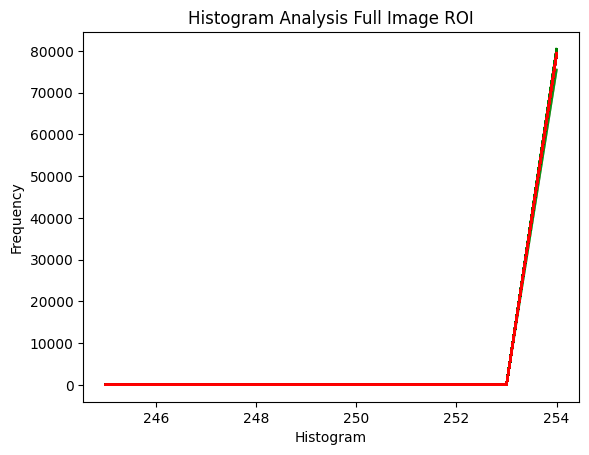

In [24]:
# import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np

# Membaca data dari file CSV
data = pd.read_csv('OZ_All file Histogram Analysis_Full Image ROI.csv')  # Gantilah 'nama_file.csv' dengan nama file CSV Anda

# Memeriksa struktur data
print(data.head())

data1 = data[data['category'] == 'good']
data2 = data[data['category'] == 'reject']

xData = np.arange(245, 255)
yData = data.iloc[0:, 5:].values

# Convert NumPy arrays to lists
xData_list = xData.tolist()
yData_list = yData.tolist()

plt.plot(xData, data1.iloc[:, 5:].values.T, linestyle='-', label='Good', color='green', alpha=0.7)
plt.plot(xData, data2.iloc[:, 5:].values.T, linestyle='-', label='Reject', color='red', alpha=0.7)

# Menampilkan legenda dan label
plt.title('Histogram Analysis Full Image ROI')
plt.xlabel('Histogram')  # Replace with the actual x-axis label
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [25]:
#Get the Feature Data
def getDataFeature():
  dtFeature = HistFeaturesLabel()
  
  directory = "CAMERA 4_OZ/"
  subpath = "good_cropped_png/"
  newDirectory = directory + subpath
  number = 1
  category = "good"
  classData = 0

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_bottle.jpg')
        featureImage = HistAnalysis(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")

  directory = "CAMERA 4_OZ/"
  subpath = "color tone_cropped_png/"
  newDirectory = directory + subpath
  number = 1
  category = "reject"
  classData = 1

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_bottle.jpg')
        featureImage = HistAnalysis(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1

        print(f"{number} {nameFile}")
 
  return dtFeature

In [26]:
FeatureData = getDataFeature()
good_df = pd.DataFrame(FeatureData)
good_csv = 'OZ_All file Histogram Analysis_Bottle ROI.csv'
good_df.to_csv(good_csv, index=False,header=False)

2 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1.png
3 CAMERA 4_OZ/good_cropped_png/OZ_Cropped10.png
4 CAMERA 4_OZ/good_cropped_png/OZ_Cropped100.png
5 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1000.png
6 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1001.png
7 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1002.png
8 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1003.png
9 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1004.png
10 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1005.png
11 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1006.png
12 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1007.png
13 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1008.png
14 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1009.png
15 CAMERA 4_OZ/good_cropped_png/OZ_Cropped101.png
16 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1010.png
17 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1011.png
18 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1012.png
19 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1013.png
20 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1014.png
21 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1015

   number                                         Filename category  class  \
0       1     CAMERA 4_OZ/good_cropped_png/OZ_Cropped1.png     good      0   
1       2    CAMERA 4_OZ/good_cropped_png/OZ_Cropped10.png     good      0   
2       3   CAMERA 4_OZ/good_cropped_png/OZ_Cropped100.png     good      0   
3       4  CAMERA 4_OZ/good_cropped_png/OZ_Cropped1000.png     good      0   
4       5  CAMERA 4_OZ/good_cropped_png/OZ_Cropped1001.png     good      0   

   duration  Histogram 245  Histogram 246  Histogram 247  Histogram 248  \
0     0.015              0              0              0              0   
1     0.000              0              0              0              0   
2     0.016              0              0              0              0   
3     0.016              0              0              0              0   
4     0.015              0              0              0              0   

   Histogram 249  Histogram 250  Histogram 251  Histogram 252  Histogram 253  \


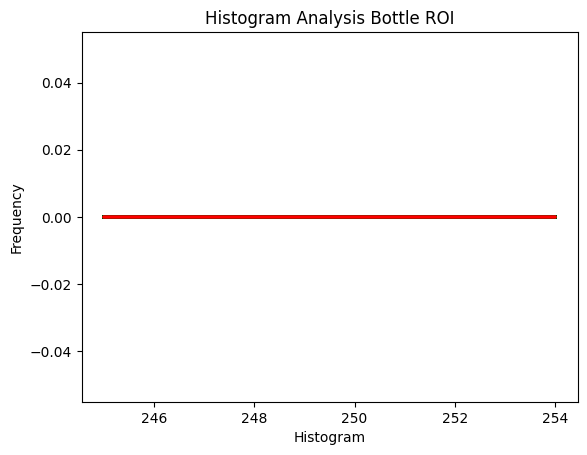

In [27]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# Membaca data dari file CSV
data = pd.read_csv('OZ_All file Histogram Analysis_Bottle ROI.csv')  # Gantilah 'nama_file.csv' dengan nama file CSV Anda

# Memeriksa struktur data
print(data.head())

data1 = data[data['category'] == 'good']
data2 = data[data['category'] == 'reject']

xData = np.arange(245, 255)
yData = data.iloc[0:, 5:].values

# Convert NumPy arrays to lists
xData_list = xData.tolist()
yData_list = yData.tolist()

plt.plot(xData, data1.iloc[:, 5:].values.T, linestyle='-', label='Good', color='green', alpha=0.7)
plt.plot(xData, data2.iloc[:, 5:].values.T, linestyle='-', label='Reject', color='red', alpha=0.7)

# Menampilkan legenda dan label
plt.title('Histogram Analysis Bottle ROI')
plt.xlabel('Histogram')  # Replace with the actual x-axis label
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [28]:
#Get the Feature Data
def getDataFeature():
  dtFeature = HistFeaturesLabel()
  
  directory = "CAMERA 4_OZ/"
  subpath = "good_cropped_png/"
  newDirectory = directory + subpath
  number = 1
  category = "good"
  classData = 0

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_fullprint.jpg')
        featureImage = HistAnalysis(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")

  directory = "CAMERA 4_OZ/"
  subpath = "color tone_cropped_png/"
  newDirectory = directory + subpath
  number = 1
  category = "reject"
  classData = 1

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_fullprint.jpg')
        featureImage = HistAnalysis(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1

        print(f"{number} {nameFile}")
 
  return dtFeature

In [29]:
FeatureData = getDataFeature()
good_df = pd.DataFrame(FeatureData)
good_csv = 'OZ_All file Histogram Analysis_Fullprint ROI.csv'
good_df.to_csv(good_csv, index=False,header=False)

2 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1.png
3 CAMERA 4_OZ/good_cropped_png/OZ_Cropped10.png
4 CAMERA 4_OZ/good_cropped_png/OZ_Cropped100.png
5 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1000.png
6 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1001.png
7 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1002.png
8 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1003.png
9 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1004.png
10 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1005.png
11 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1006.png
12 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1007.png
13 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1008.png
14 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1009.png
15 CAMERA 4_OZ/good_cropped_png/OZ_Cropped101.png
16 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1010.png
17 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1011.png
18 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1012.png
19 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1013.png
20 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1014.png
21 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1015

   number                                         Filename category  class  \
0       1     CAMERA 4_OZ/good_cropped_png/OZ_Cropped1.png     good      0   
1       2    CAMERA 4_OZ/good_cropped_png/OZ_Cropped10.png     good      0   
2       3   CAMERA 4_OZ/good_cropped_png/OZ_Cropped100.png     good      0   
3       4  CAMERA 4_OZ/good_cropped_png/OZ_Cropped1000.png     good      0   
4       5  CAMERA 4_OZ/good_cropped_png/OZ_Cropped1001.png     good      0   

   duration  Histogram 245  Histogram 246  Histogram 247  Histogram 248  \
0     0.000              0              0              0              0   
1     0.000              0              0              0              0   
2     0.000              0              0              0              0   
3     0.015              0              0              0              0   
4     0.000              0              0              0              0   

   Histogram 249  Histogram 250  Histogram 251  Histogram 252  Histogram 253  \


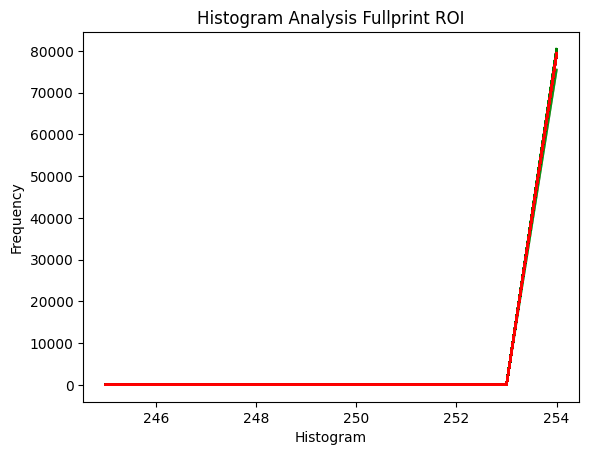

In [30]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# Membaca data dari file CSV
data = pd.read_csv('OZ_All file Histogram Analysis_Fullprint ROI.csv')  # Gantilah 'nama_file.csv' dengan nama file CSV Anda

# Memeriksa struktur data
print(data.head())

data1 = data[data['category'] == 'good']
data2 = data[data['category'] == 'reject']

xData = np.arange(245, 255)
yData = data.iloc[0:, 5:].values

# Convert NumPy arrays to lists
xData_list = xData.tolist()
yData_list = yData.tolist()

plt.plot(xData, data1.iloc[:, 5:].values.T, linestyle='-', label='Good', color='green', alpha=0.7)
plt.plot(xData, data2.iloc[:, 5:].values.T, linestyle='-', label='Reject', color='red', alpha=0.7)

# Menampilkan legenda dan label
plt.title('Histogram Analysis Fullprint ROI')
plt.xlabel('Histogram')  # Replace with the actual x-axis label
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

## GLCM Analysis

In [31]:
#Get the Feature Data
def getDataFeature():
  dtFeature = GLCMFeaturesLabel()
  
  directory = "CAMERA 4_OZ/"
  subpath = "good_image_png/"
  newDirectory = directory + subpath
  number = 1
  category = "good"
  classData = 0

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        featureImage = GLCMFeatureImage(image)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")
        
  directory = "CAMERA 4_OZ/"
  subpath = "color tone_image_png/"
  newDirectory = directory + subpath
  number = 1
  category = "reject"
  classData = 1

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        featureImage = GLCMFeatureImage(image)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")
            
  return dtFeature

In [32]:
FeatureData = getDataFeature()
good_df = pd.DataFrame(FeatureData)
good_csv = 'OZ_All file GLCM Analysis_Full Image ROI.csv'
good_df.to_csv(good_csv, index=False,header=False)

2 CAMERA 4_OZ/good_image_png/OZ_good_image1.png
3 CAMERA 4_OZ/good_image_png/OZ_good_image10.png
4 CAMERA 4_OZ/good_image_png/OZ_good_image100.png
5 CAMERA 4_OZ/good_image_png/OZ_good_image1000.png
6 CAMERA 4_OZ/good_image_png/OZ_good_image1001.png
7 CAMERA 4_OZ/good_image_png/OZ_good_image1002.png
8 CAMERA 4_OZ/good_image_png/OZ_good_image1003.png
9 CAMERA 4_OZ/good_image_png/OZ_good_image1004.png
10 CAMERA 4_OZ/good_image_png/OZ_good_image1005.png
11 CAMERA 4_OZ/good_image_png/OZ_good_image1006.png
12 CAMERA 4_OZ/good_image_png/OZ_good_image1007.png
13 CAMERA 4_OZ/good_image_png/OZ_good_image1008.png
14 CAMERA 4_OZ/good_image_png/OZ_good_image1009.png
15 CAMERA 4_OZ/good_image_png/OZ_good_image101.png
16 CAMERA 4_OZ/good_image_png/OZ_good_image1010.png
17 CAMERA 4_OZ/good_image_png/OZ_good_image1011.png
18 CAMERA 4_OZ/good_image_png/OZ_good_image1012.png
19 CAMERA 4_OZ/good_image_png/OZ_good_image1013.png
20 CAMERA 4_OZ/good_image_png/OZ_good_image1014.png
21 CAMERA 4_OZ/good_image_p

   number                                          Filename category  class  \
0       1     CAMERA 4_OZ/good_image_png/OZ_good_image1.png     good      0   
1       2    CAMERA 4_OZ/good_image_png/OZ_good_image10.png     good      0   
2       3   CAMERA 4_OZ/good_image_png/OZ_good_image100.png     good      0   
3       4  CAMERA 4_OZ/good_image_png/OZ_good_image1000.png     good      0   
4       5  CAMERA 4_OZ/good_image_png/OZ_good_image1001.png     good      0   

   duration  Dissimilarity 0  Dissimilarity 45  Dissimilarity 90  \
0     0.047         1.850197          2.446026          1.849778   
1     0.046         1.637252          2.232766          1.666462   
2     0.047         1.739067          2.343326          1.823174   
3     0.047         1.625048          2.204761          1.685466   
4     0.047         1.625790          2.256500          1.729903   

   Dissimilarity 135  Energy 0  ...  Homogeneity 90  Homogeneity 135  \
0           2.431533  0.654682  ...        0

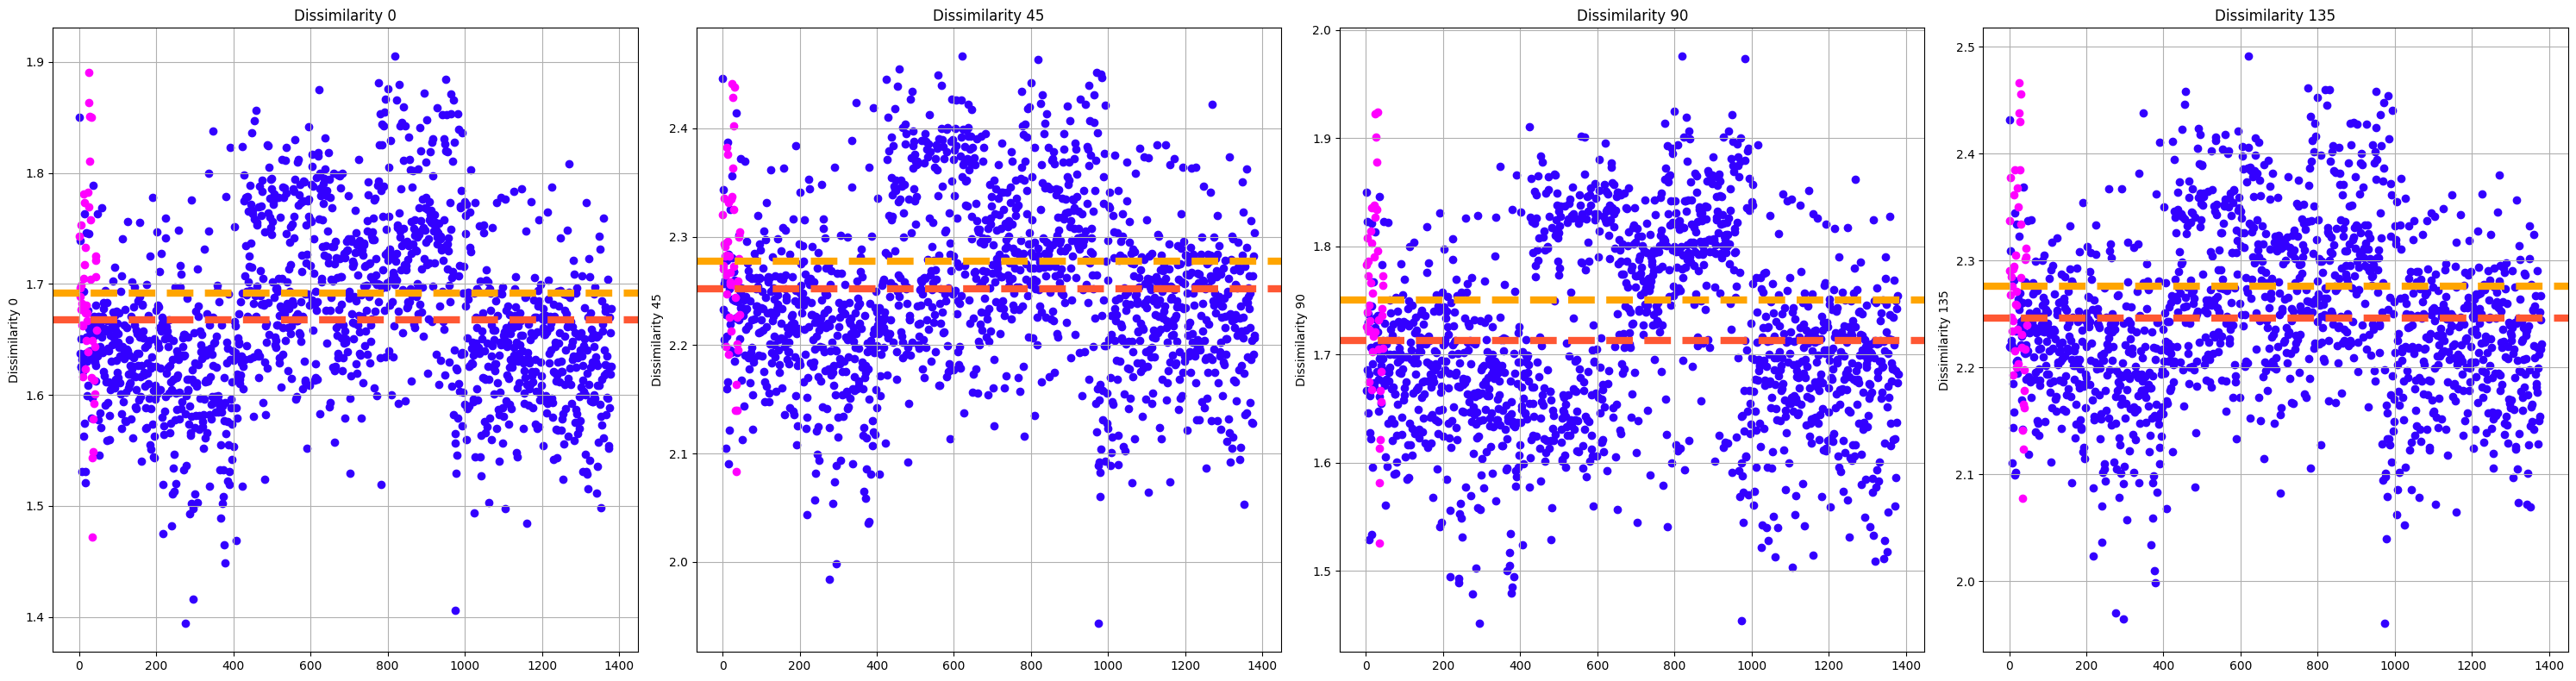

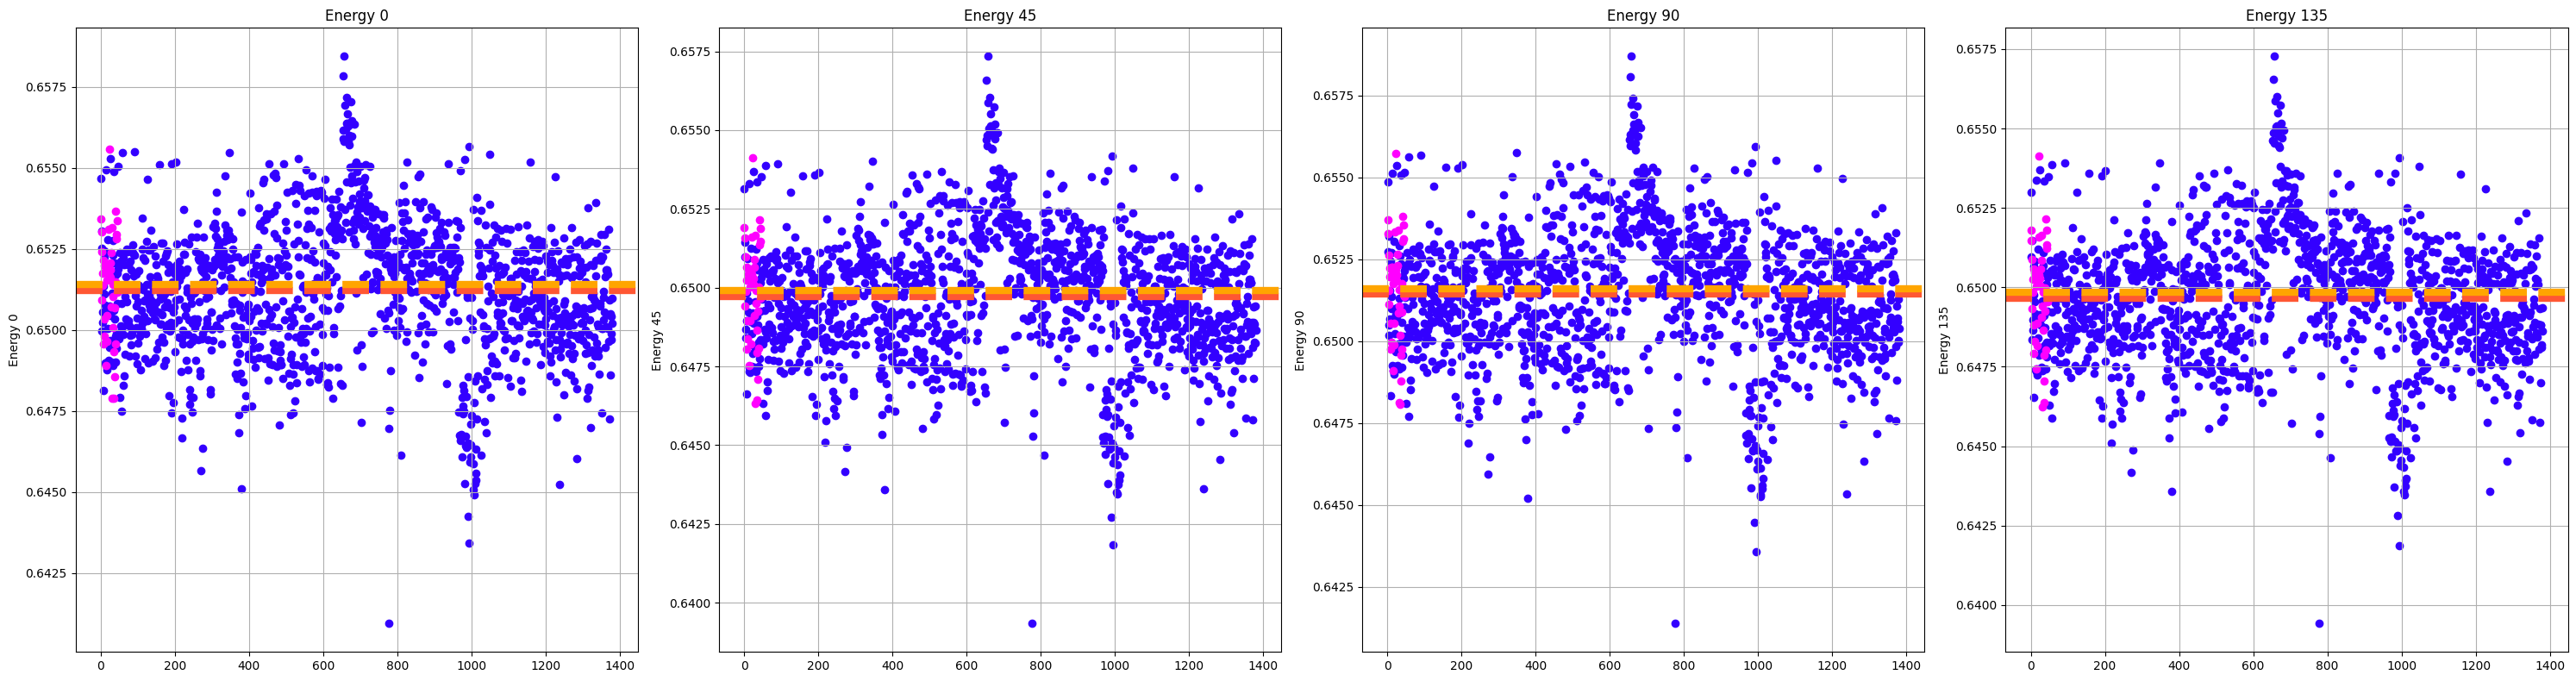

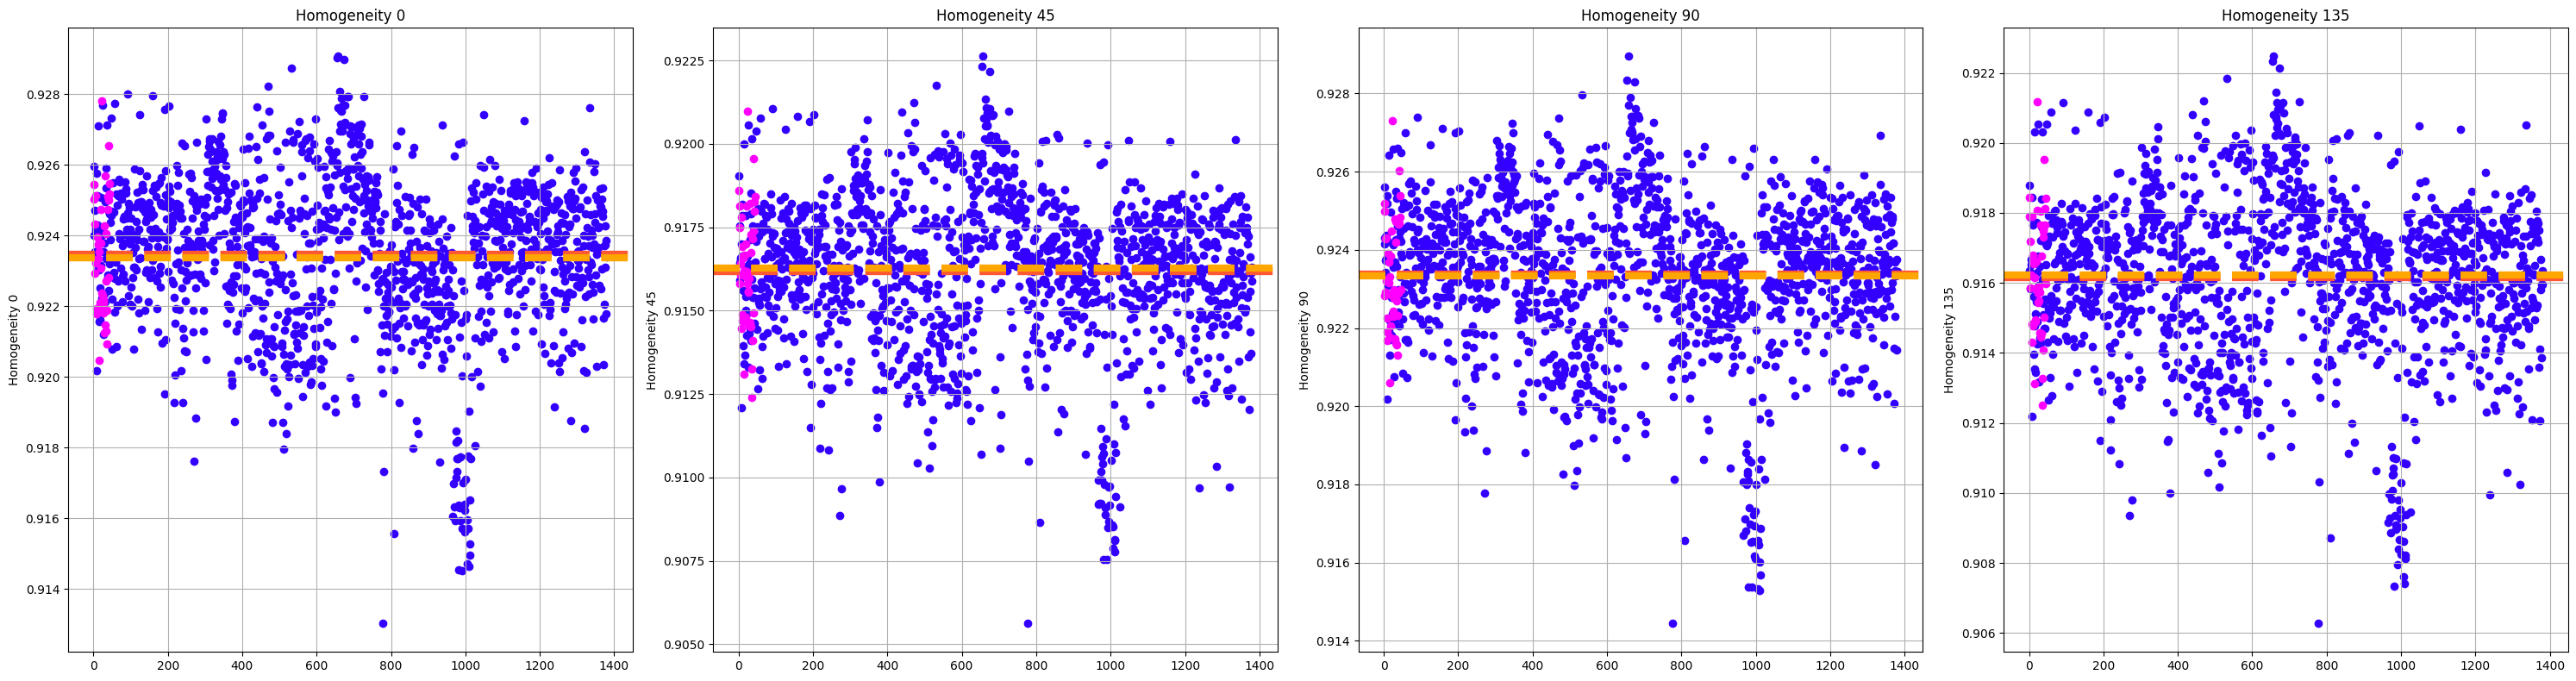

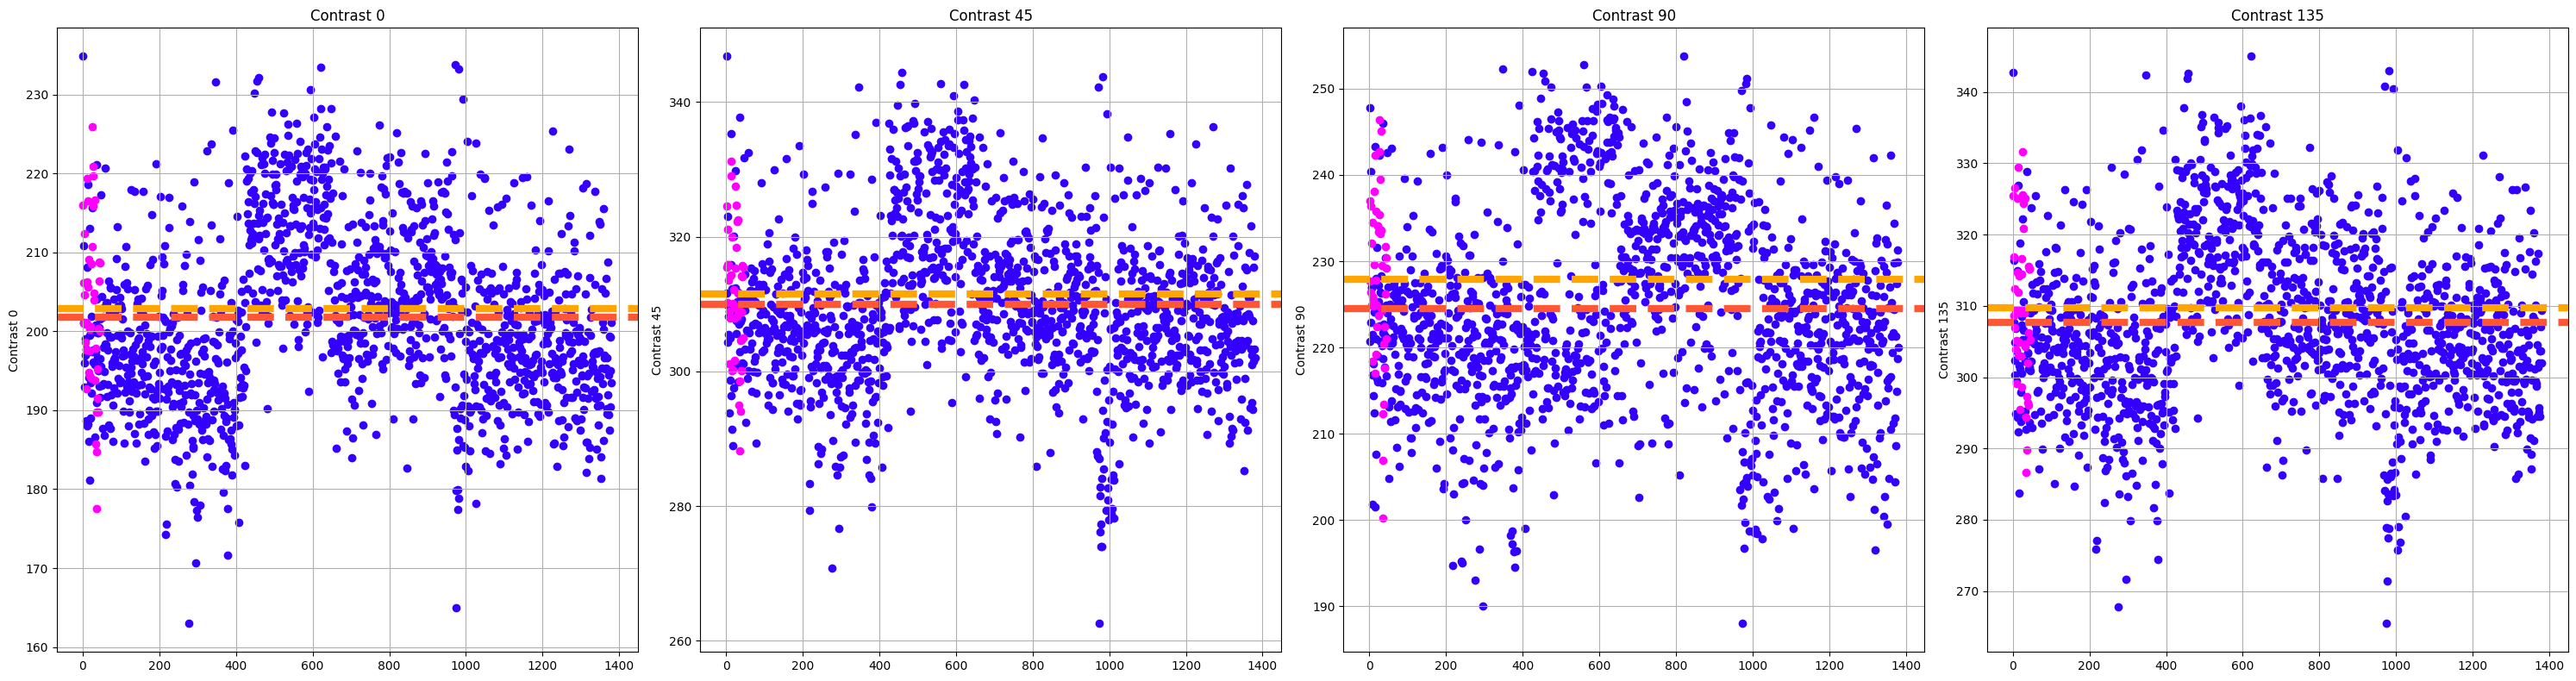

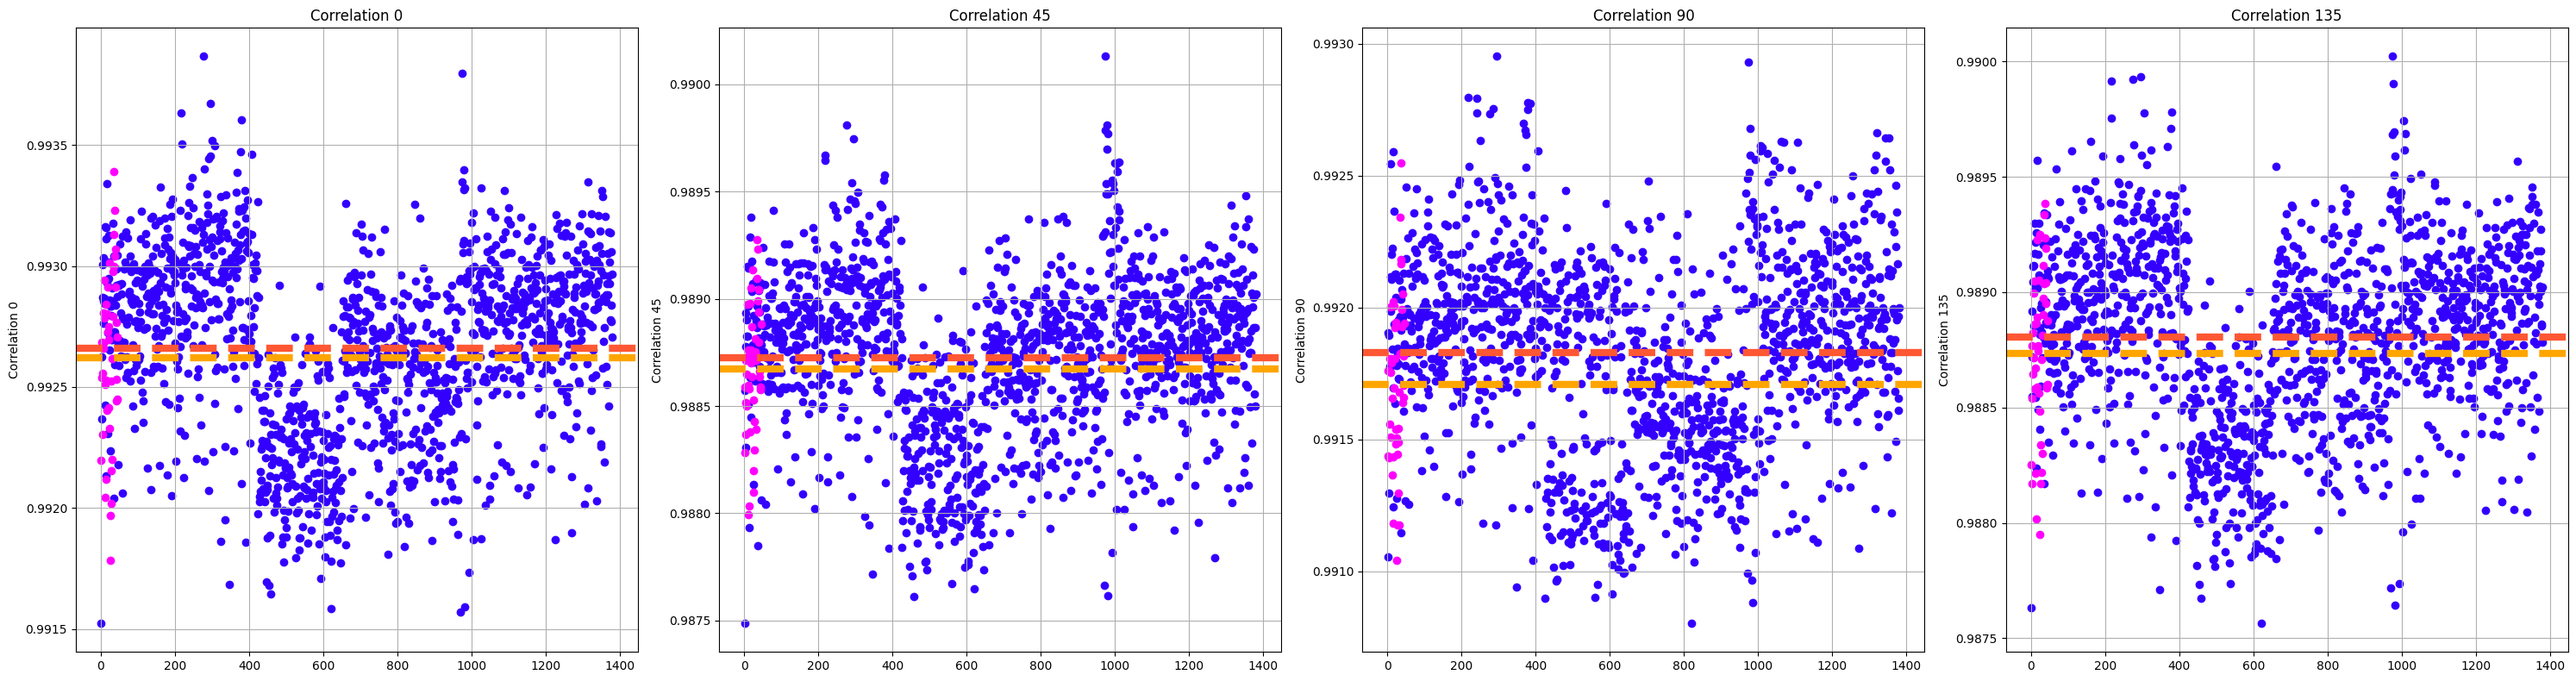

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
data = pd.read_csv('OZ_All file GLCM Analysis_Full Image ROI.csv')  # Gantilah 'nama_file.csv' dengan nama file CSV Anda

# Memeriksa struktur data
print(data.head())

data1 = data[data['category'] == 'good']
data2 = data[data['category'] == 'reject']

dissimilarity_columns = ['Dissimilarity 0', 'Dissimilarity 45', 'Dissimilarity 90', 'Dissimilarity 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(dissimilarity_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#3300FF')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF00FF')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='#FF5733', linestyle='--', linewidth=6, label='Rata-rata Baik full image ROI')
    axs[i].axhline(y=mean_value2, color='orange', linestyle='--', linewidth=6, label='Rata-rata Cacat full image ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

energy_columns = ['Energy 0', 'Energy 45', 'Energy 90', 'Energy 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(energy_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#3300FF')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF00FF')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='#FF5733', linestyle='--', linewidth=6, label='Rata-rata Baik full image ROI')
    axs[i].axhline(y=mean_value2, color='orange', linestyle='--', linewidth=6, label='Rata-rata Cacat full image ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

homogeneity_columns = ['Homogeneity 0', 'Homogeneity 45', 'Homogeneity 90', 'Homogeneity 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(homogeneity_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#3300FF')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF00FF')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='#FF5733', linestyle='--', linewidth=6, label='Rata-rata Baik full image ROI')
    axs[i].axhline(y=mean_value2, color='orange', linestyle='--', linewidth=6, label='Rata-rata Cacat full image ROI')
    
    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

contrast_columns = ['Contrast 0', 'Contrast 45', 'Contrast 90', 'Contrast 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(contrast_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#3300FF')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF00FF')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='#FF5733', linestyle='--', linewidth=6, label='Rata-rata Baik full image ROI')
    axs[i].axhline(y=mean_value2, color='orange', linestyle='--', linewidth=6, label='Rata-rata Cacat full image ROI')


    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

correlation_columns = ['Correlation 0', 'Correlation 45', 'Correlation 90', 'Correlation 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(correlation_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#3300FF')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF00FF')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='#FF5733', linestyle='--', linewidth=6, label='Rata-rata Baik full image ROI')
    axs[i].axhline(y=mean_value2, color='orange', linestyle='--', linewidth=6, label='Rata-rata Cacat full image ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [34]:
#Get the Feature Data
def getDataFeature():
  dtFeature = GLCMFeaturesLabel()
  
  directory = "CAMERA 4_OZ/"
  subpath = "good_bottle_png/"
  newDirectory = directory + subpath
  number = 1
  category = "good"
  classData = 0

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_bottle.jpg')
        featureImage = GLCMFeatureImage(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")
        
  directory = "CAMERA 4_OZ/"
  subpath = "color tone_bottle_png/"
  newDirectory = directory + subpath
  number = 1
  category = "reject"
  classData = 1

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_bottle.jpg')
        featureImage = GLCMFeatureImage(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")
            
  return dtFeature

In [35]:
FeatureData = getDataFeature()
good_df = pd.DataFrame(FeatureData)
good_csv = 'OZ_All file GLCM Analysis_Bottle ROI.csv'
good_df.to_csv(good_csv, index=False,header=False)

2 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1.png
3 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle10.png
4 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle100.png
5 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1000.png
6 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1001.png
7 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1002.png
8 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1003.png
9 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1004.png
10 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1005.png
11 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1006.png
12 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1007.png
13 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1008.png
14 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1009.png
15 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle101.png
16 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1010.png
17 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1011.png
18 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1012.png
19 CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1013.png
20 CAMERA 4_OZ/good_bottle_png/OZ_good_bott

   number                                           Filename category  class  \
0       1    CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1.png     good      0   
1       2   CAMERA 4_OZ/good_bottle_png/OZ_good_bottle10.png     good      0   
2       3  CAMERA 4_OZ/good_bottle_png/OZ_good_bottle100.png     good      0   
3       4  CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1000...     good      0   
4       5  CAMERA 4_OZ/good_bottle_png/OZ_good_bottle1001...     good      0   

   duration  Dissimilarity 0  Dissimilarity 45  Dissimilarity 90  \
0     0.047         4.759156          6.162341          4.640101   
1     0.047         4.131474          5.532731          4.099782   
2     0.047         4.425364          5.858018          4.546707   
3     0.047         4.061778          5.431178          4.143676   
4     0.031         4.086315          5.608310          4.287554   

   Dissimilarity 135  Energy 0  ...  Homogeneity 90  Homogeneity 135  \
0           6.116596  0.706988  ...   

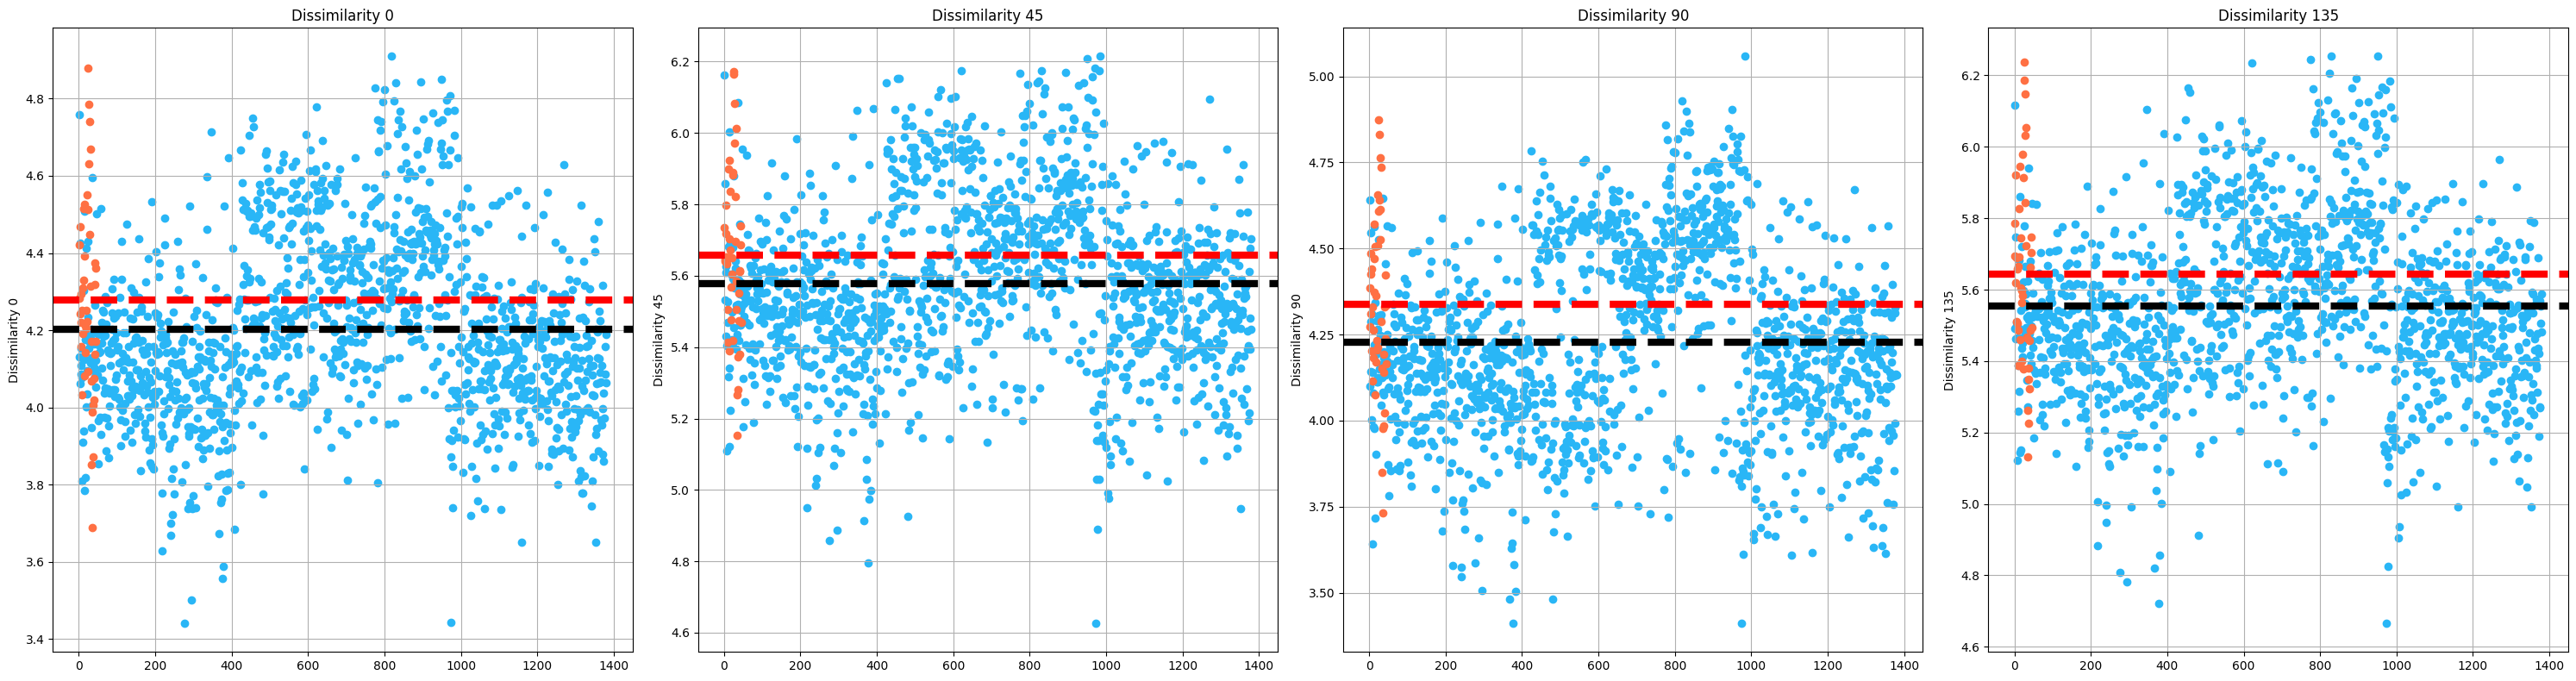

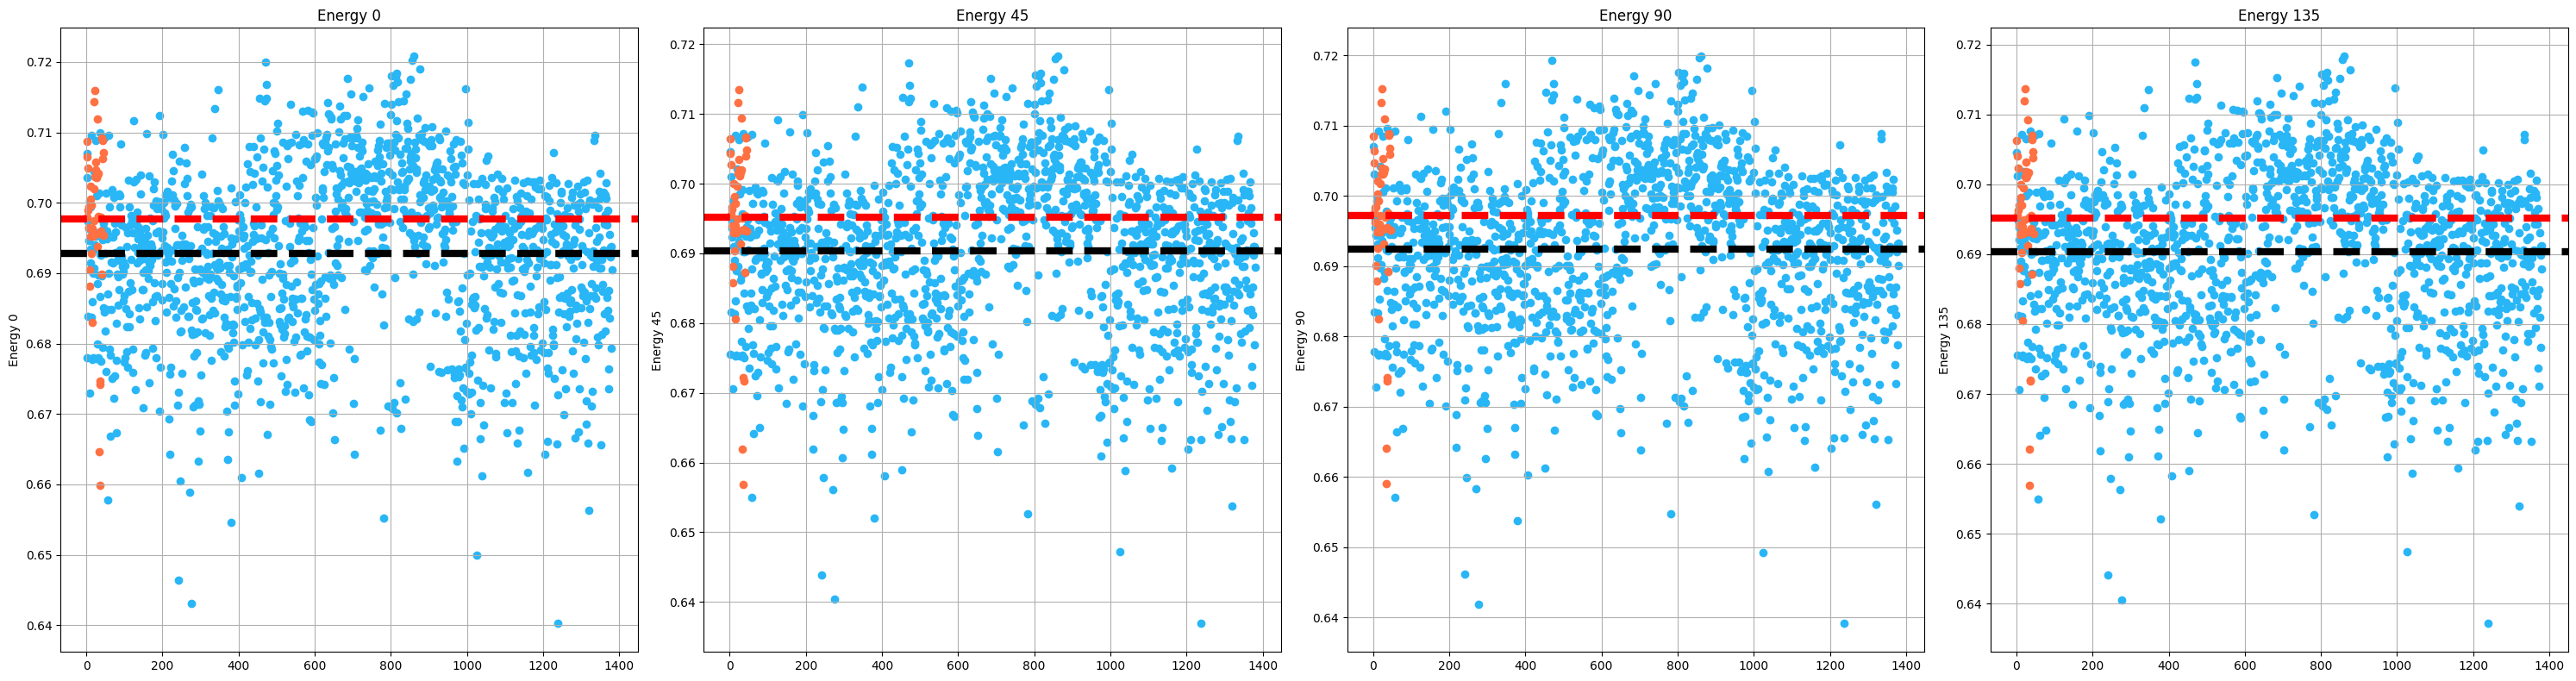

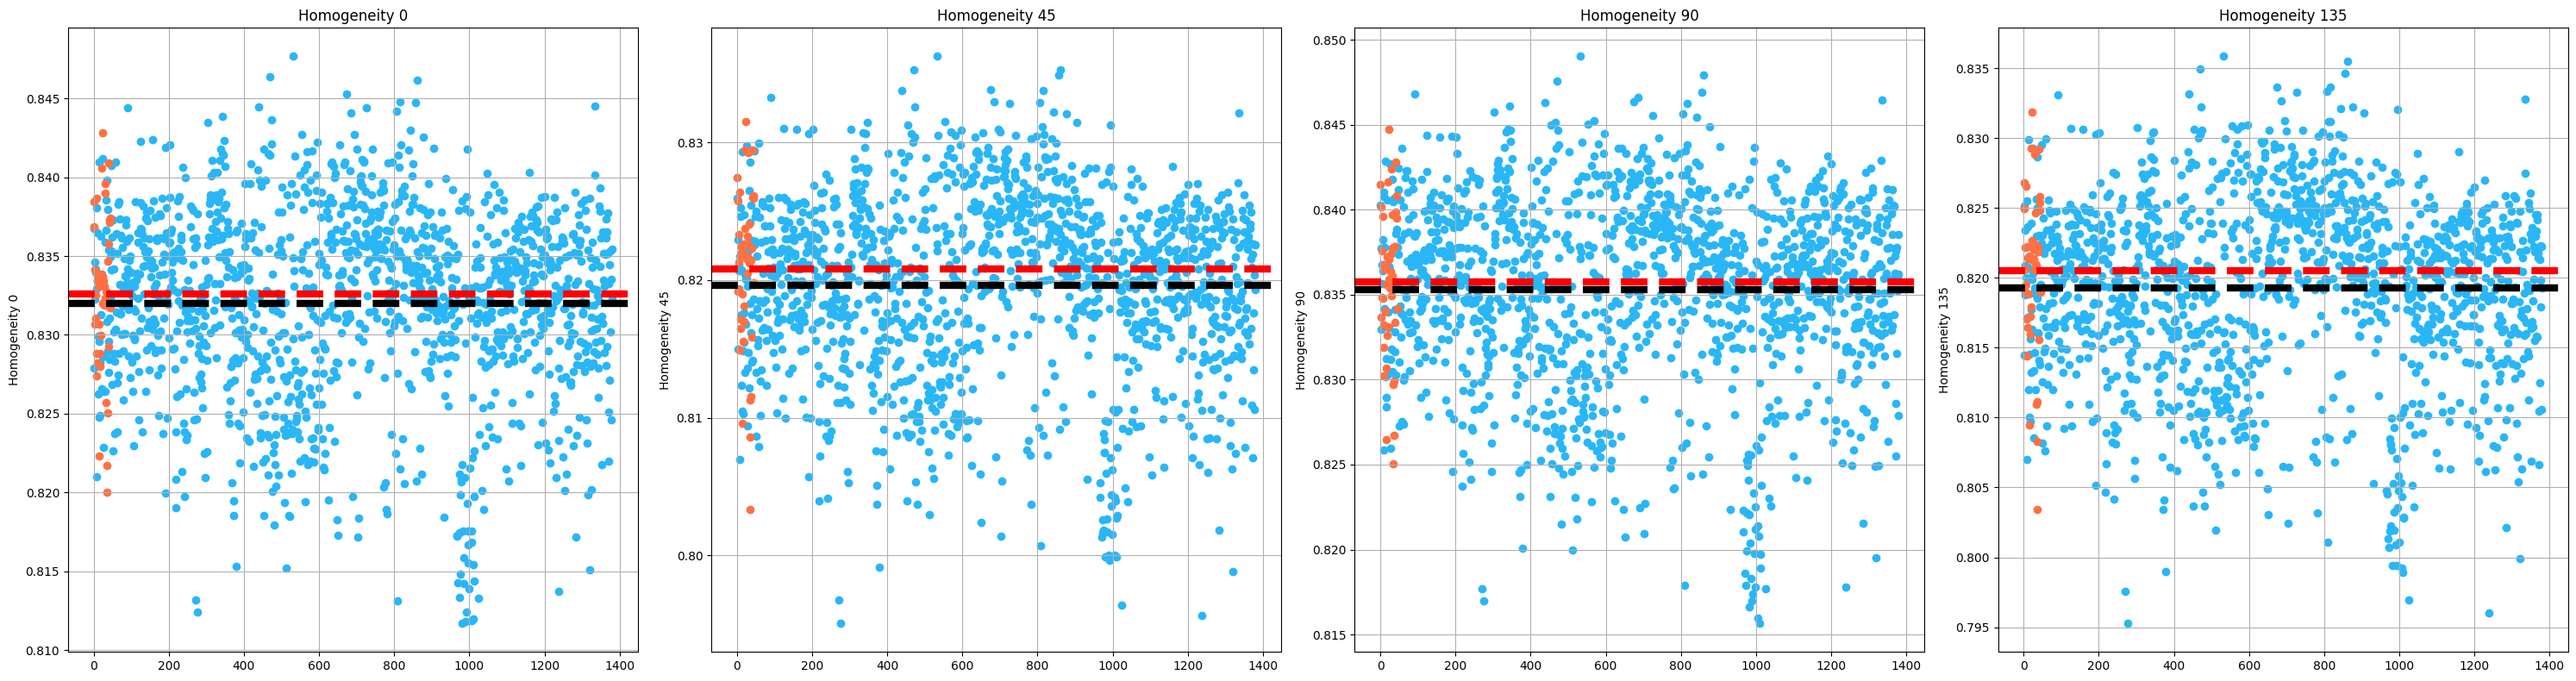

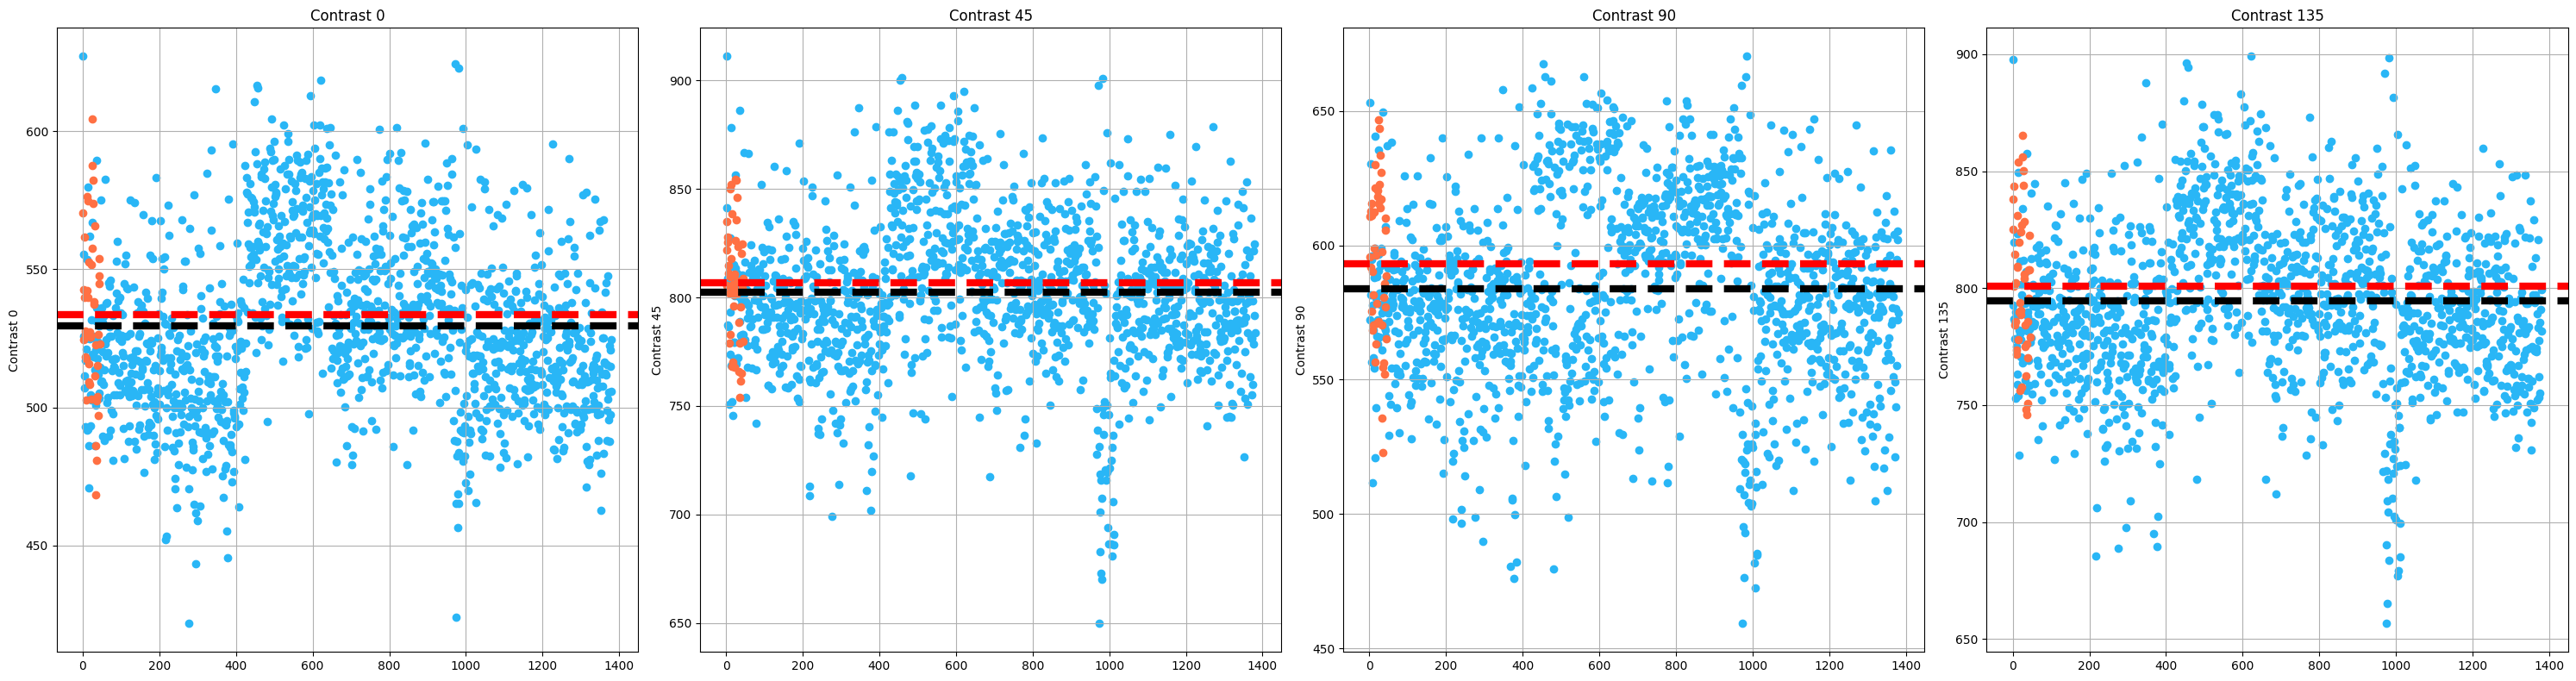

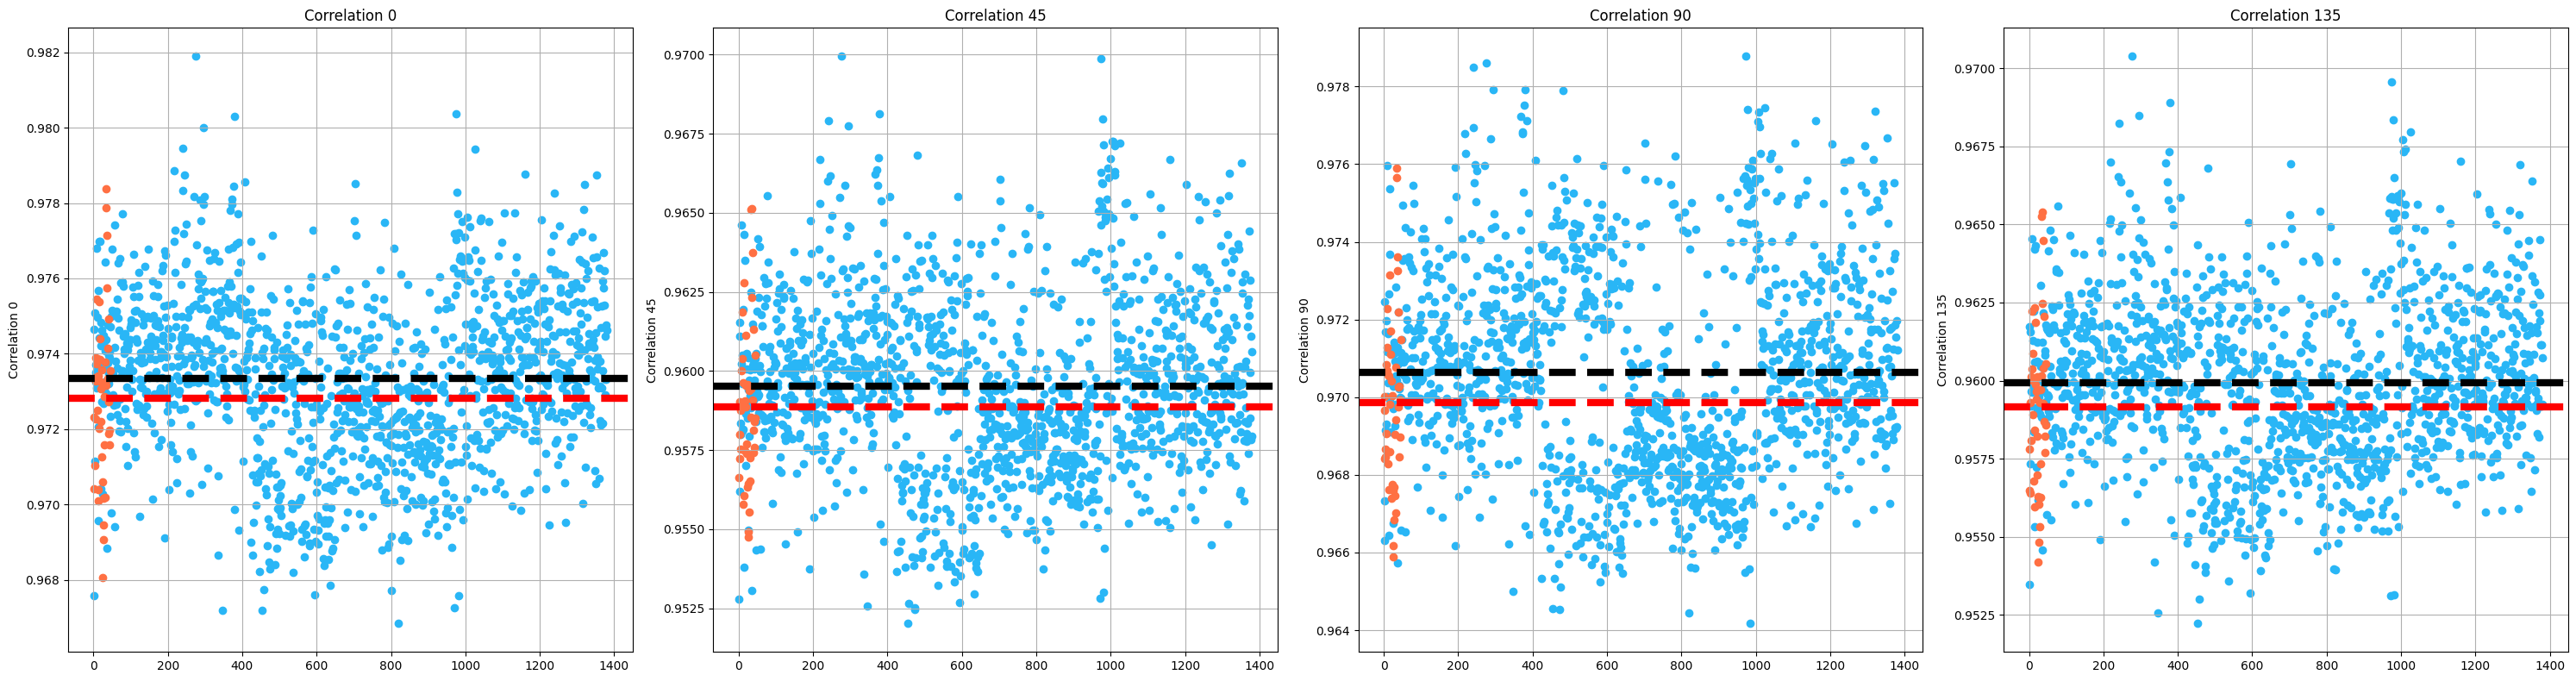

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
data = pd.read_csv('OZ_All file GLCM Analysis_Bottle ROI.csv')  # Gantilah 'nama_file.csv' dengan nama file CSV Anda

# Memeriksa struktur data
print(data.head())

data1 = data[data['category'] == 'good']
data2 = data[data['category'] == 'reject']

dissimilarity_columns = ['Dissimilarity 0', 'Dissimilarity 45', 'Dissimilarity 90', 'Dissimilarity 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(dissimilarity_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#29B6F6')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF7043')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='black', linestyle='--', linewidth=6, label='Rata-rata Baik bottle ROI')
    axs[i].axhline(y=mean_value2, color='red', linestyle='--', linewidth=6, label='Rata-rata Cacat bottle ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

energy_columns = ['Energy 0', 'Energy 45', 'Energy 90', 'Energy 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(energy_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#29B6F6')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF7043')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='black', linestyle='--', linewidth=6, label='Rata-rata Baik bottle ROI')
    axs[i].axhline(y=mean_value2, color='red', linestyle='--', linewidth=6, label='Rata-rata Cacat bottle ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

homogeneity_columns = ['Homogeneity 0', 'Homogeneity 45', 'Homogeneity 90', 'Homogeneity 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(homogeneity_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#29B6F6')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF7043')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='black', linestyle='--', linewidth=6, label='Rata-rata Baik bottle ROI')
    axs[i].axhline(y=mean_value2, color='red', linestyle='--', linewidth=6, label='Rata-rata Cacat bottle ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

contrast_columns = ['Contrast 0', 'Contrast 45', 'Contrast 90', 'Contrast 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(contrast_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#29B6F6')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF7043')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='black', linestyle='--', linewidth=6, label='Rata-rata Baik bottle ROI')
    axs[i].axhline(y=mean_value2, color='red', linestyle='--', linewidth=6, label='Rata-rata Cacat bottle ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

correlation_columns = ['Correlation 0', 'Correlation 45', 'Correlation 90', 'Correlation 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(correlation_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#29B6F6')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF7043')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='black', linestyle='--', linewidth=6, label='Rata-rata Baik bottle ROI')
    axs[i].axhline(y=mean_value2, color='red', linestyle='--', linewidth=6, label='Rata-rata Cacat bottle ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [37]:
#Get the Feature Data
def getDataFeature():
  dtFeature = GLCMFeaturesLabel()
  
  directory = "CAMERA 4_OZ/"
  subpath = "good_cropped_png/"
  newDirectory = directory + subpath
  number = 1
  category = "good"
  classData = 0

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_fullprint.jpg')
        # thresholded = Thresholding(templateMatched)
        featureImage = GLCMFeatureImage(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")
        
  directory = "CAMERA 4_OZ/"
  subpath = "color tone_cropped_png/"
  newDirectory = directory + subpath
  number = 1
  category = "reject"
  classData = 1

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_fullprint.jpg')
        # thresholded = Thresholding(templateMatched)
        featureImage = GLCMFeatureImage(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")
            
  return dtFeature

In [38]:
FeatureData = getDataFeature()
good_df = pd.DataFrame(FeatureData)
good_csv = 'OZ_All file GLCM Analysis_Fullprint ROI.csv'
good_df.to_csv(good_csv, index=False,header=False)

2 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1.png
3 CAMERA 4_OZ/good_cropped_png/OZ_Cropped10.png
4 CAMERA 4_OZ/good_cropped_png/OZ_Cropped100.png
5 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1000.png
6 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1001.png
7 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1002.png
8 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1003.png
9 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1004.png
10 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1005.png
11 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1006.png
12 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1007.png
13 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1008.png
14 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1009.png
15 CAMERA 4_OZ/good_cropped_png/OZ_Cropped101.png
16 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1010.png
17 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1011.png
18 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1012.png
19 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1013.png
20 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1014.png
21 CAMERA 4_OZ/good_cropped_png/OZ_Cropped1015

   number                                         Filename category  class  \
0       1     CAMERA 4_OZ/good_cropped_png/OZ_Cropped1.png     good      0   
1       2    CAMERA 4_OZ/good_cropped_png/OZ_Cropped10.png     good      0   
2       3   CAMERA 4_OZ/good_cropped_png/OZ_Cropped100.png     good      0   
3       4  CAMERA 4_OZ/good_cropped_png/OZ_Cropped1000.png     good      0   
4       5  CAMERA 4_OZ/good_cropped_png/OZ_Cropped1001.png     good      0   

   duration  Dissimilarity 0  Dissimilarity 45  Dissimilarity 90  \
0     0.016         3.499063          7.256060          5.843842   
1     0.031         3.456235          7.279184          5.796541   
2     0.031         3.481864          7.261506          5.791575   
3     0.016         3.436975          7.247104          5.860435   
4     0.031         3.418031          7.215715          5.812550   

   Dissimilarity 135  Energy 0  ...  Homogeneity 90  Homogeneity 135  \
0           7.054348  0.924894  ...        0.92698

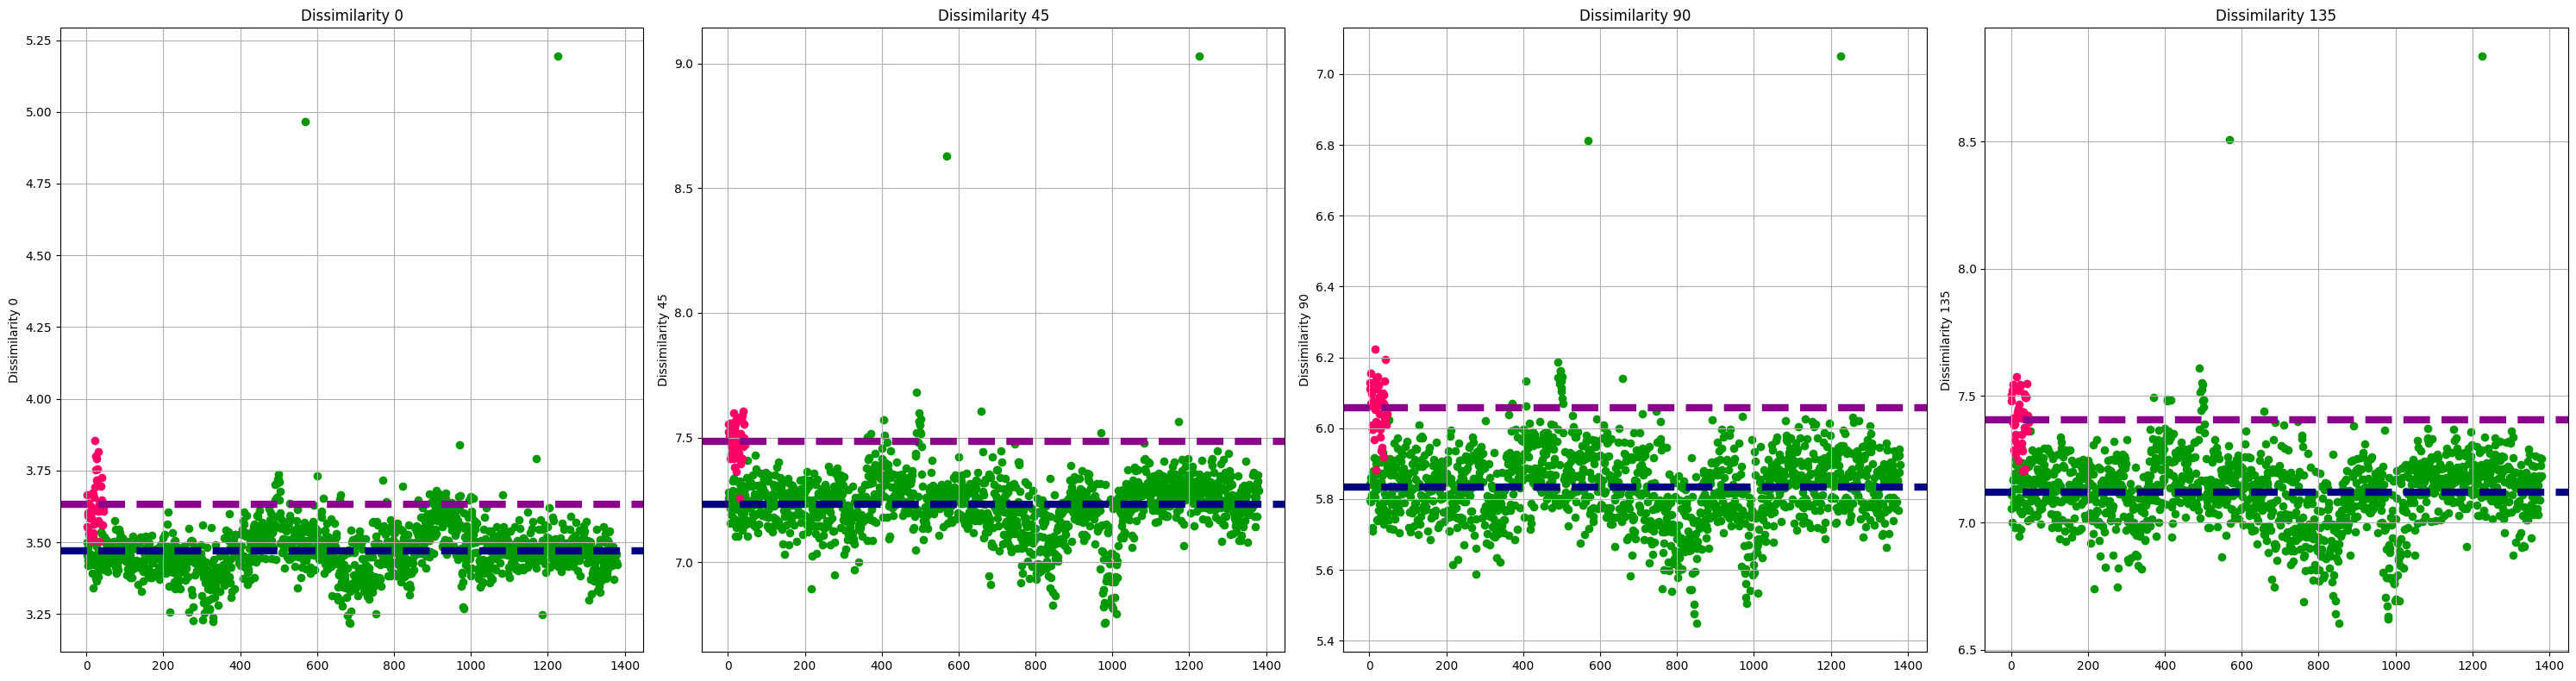

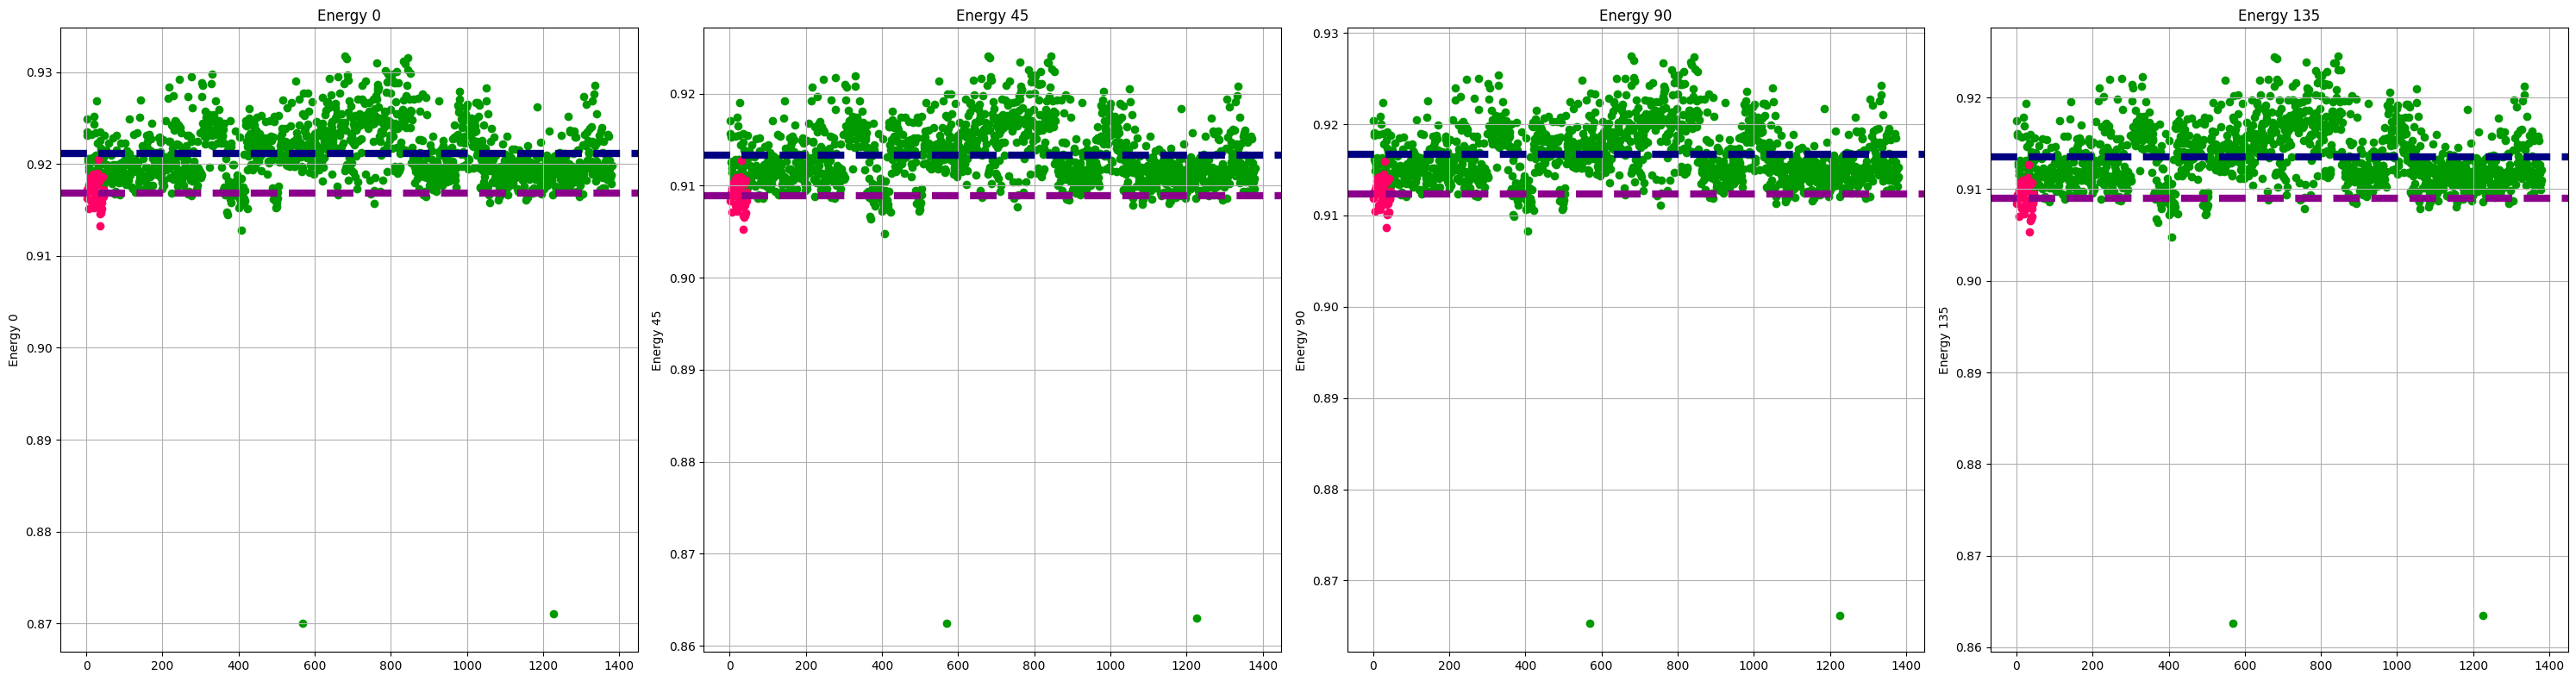

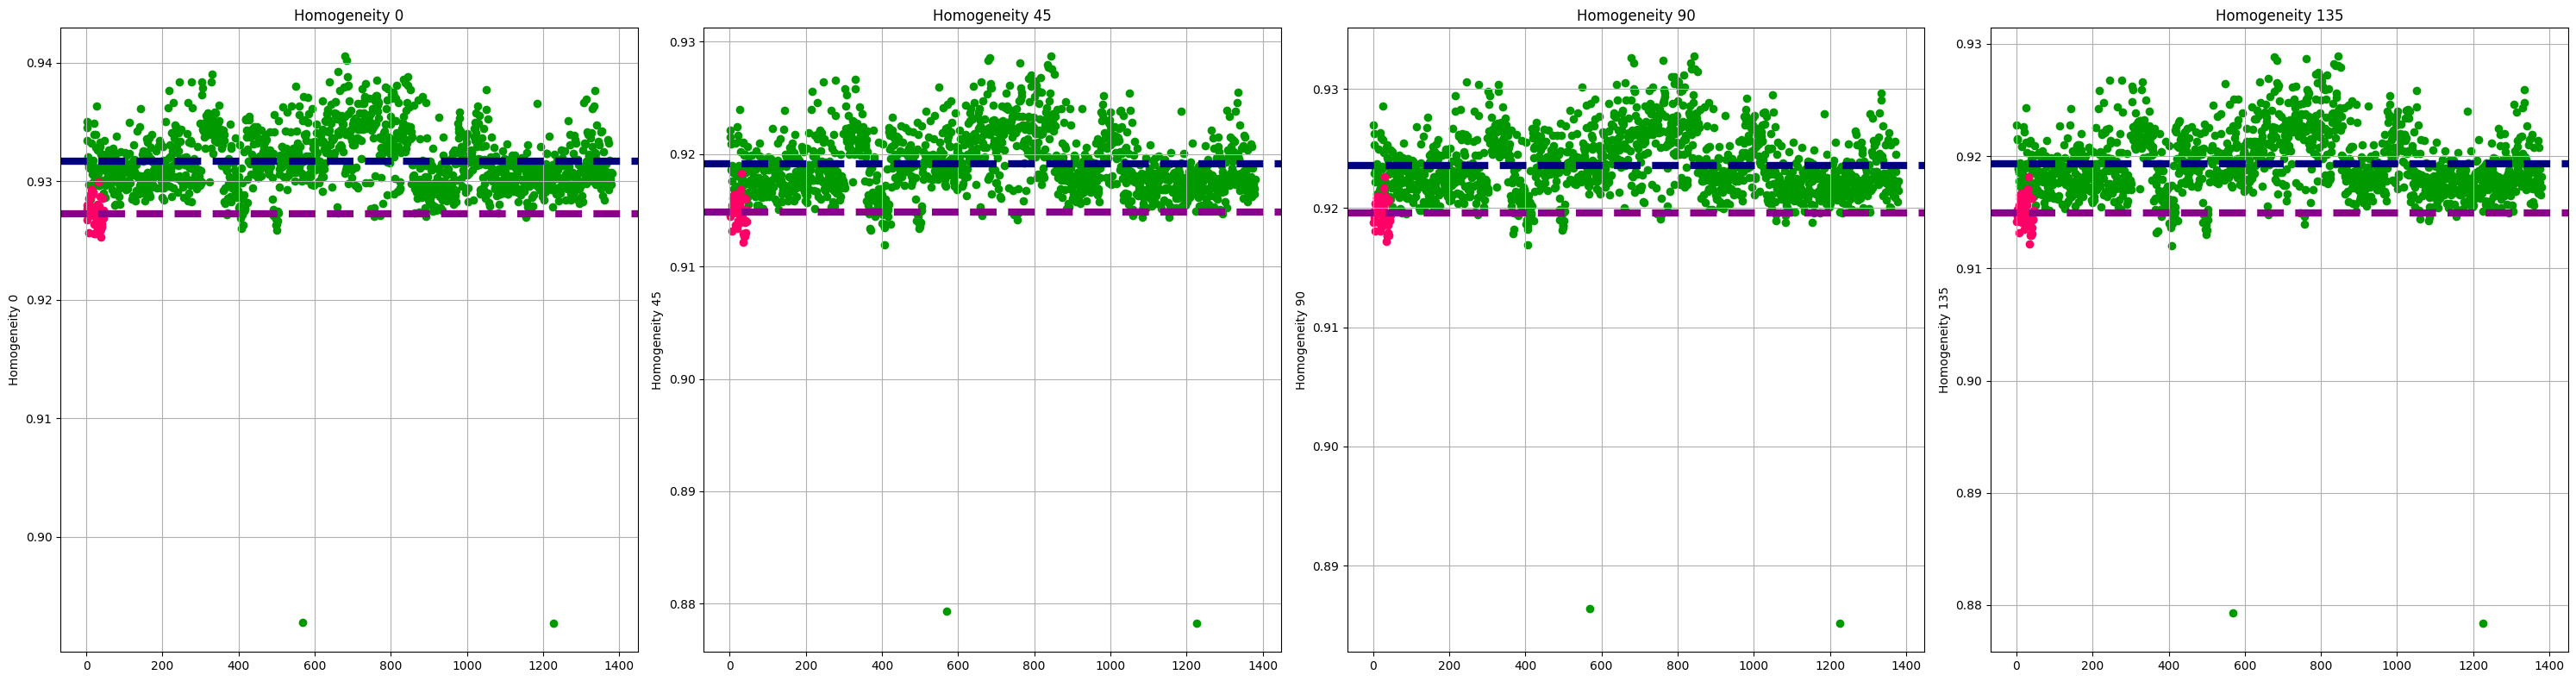

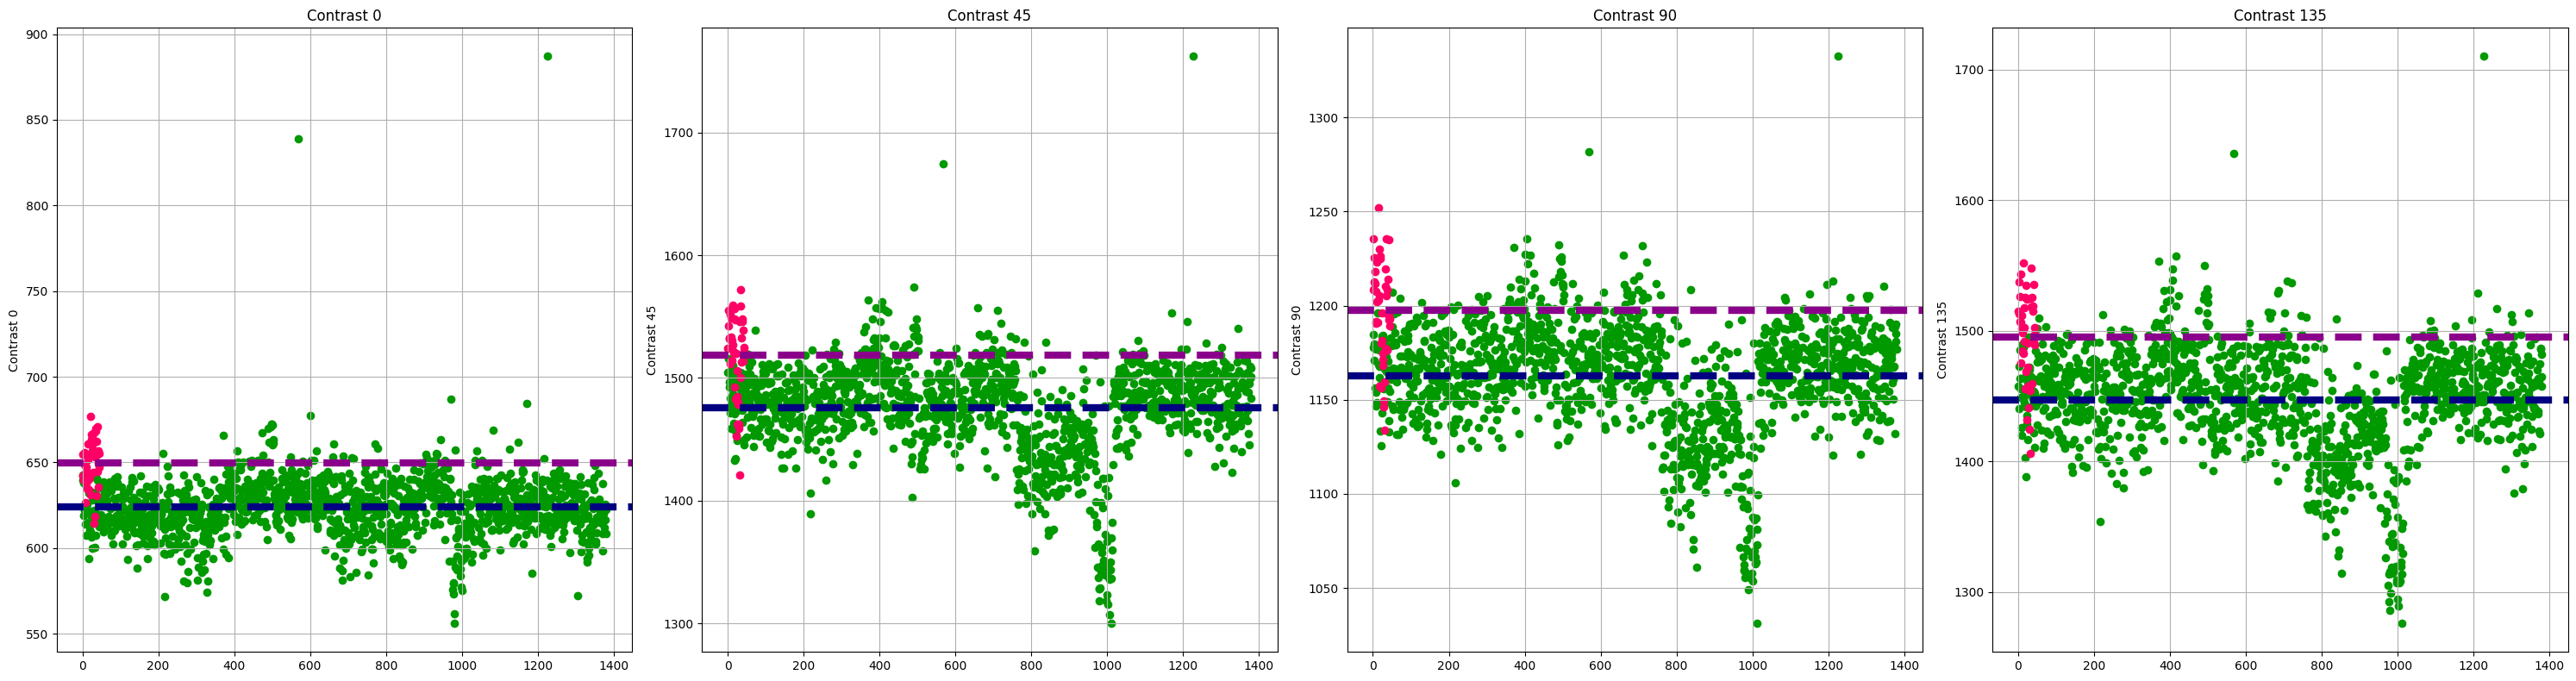

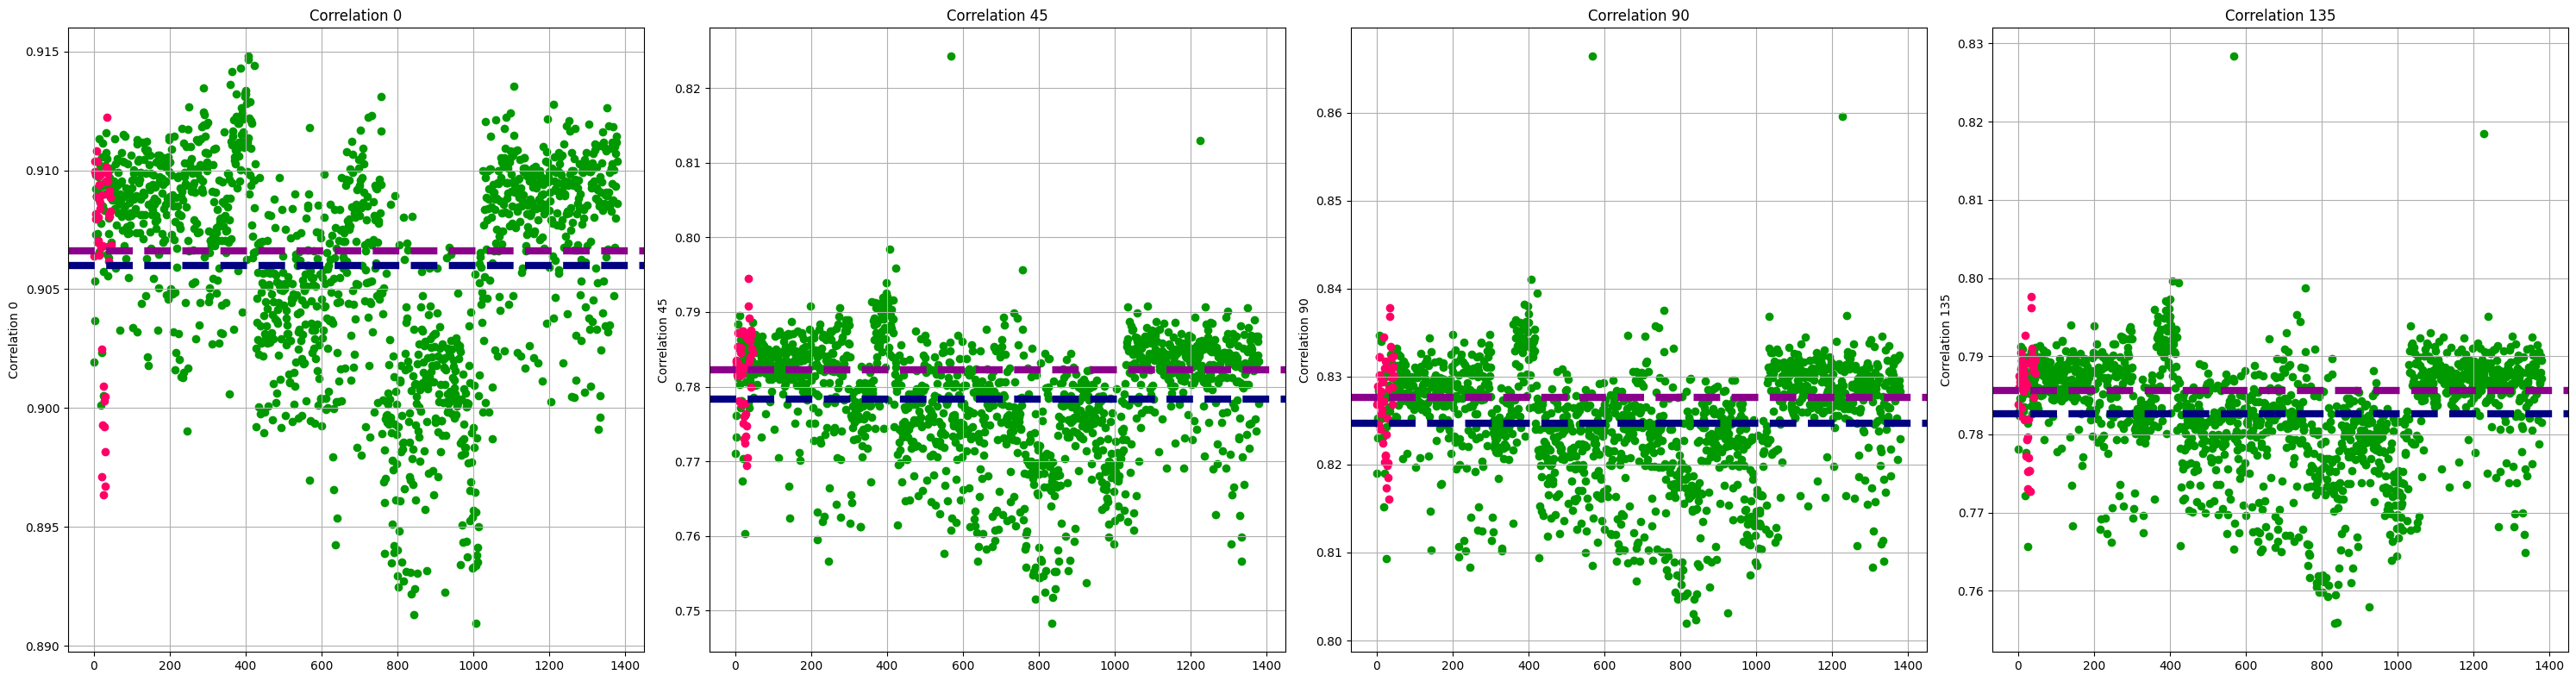

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
data = pd.read_csv('OZ_All file GLCM Analysis_Fullprint ROI.csv')  # Gantilah 'nama_file.csv' dengan nama file CSV Anda

# Memeriksa struktur data
print(data.head())

data1 = data[data['category'] == 'good']
data2 = data[data['category'] == 'reject']

dissimilarity_columns = ['Dissimilarity 0', 'Dissimilarity 45', 'Dissimilarity 90', 'Dissimilarity 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(dissimilarity_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#009900')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF0066')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='navy', linestyle='--', linewidth=6, label='Rata-rata Baik printing only ROI')
    axs[i].axhline(y=mean_value2, color='#8B008B', linestyle='--', linewidth=6, label='Rata-rata Cacat printing only ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

energy_columns = ['Energy 0', 'Energy 45', 'Energy 90', 'Energy 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(energy_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#009900')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF0066')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='navy', linestyle='--', linewidth=6, label='Rata-rata Baik printing only ROI')
    axs[i].axhline(y=mean_value2, color='#8B008B', linestyle='--', linewidth=6, label='Rata-rata Cacat printing only ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

homogeneity_columns = ['Homogeneity 0', 'Homogeneity 45', 'Homogeneity 90', 'Homogeneity 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(homogeneity_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#009900')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF0066')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='navy', linestyle='--', linewidth=6, label='Rata-rata Baik printing only ROI')
    axs[i].axhline(y=mean_value2, color='#8B008B', linestyle='--', linewidth=6, label='Rata-rata Cacat printing only ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

contrast_columns = ['Contrast 0', 'Contrast 45', 'Contrast 90', 'Contrast 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(contrast_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#009900')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF0066')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='navy', linestyle='--', linewidth=6, label='Rata-rata Baik printing only ROI')
    axs[i].axhline(y=mean_value2, color='#8B008B', linestyle='--', linewidth=6, label='Rata-rata Cacat printing only ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

correlation_columns = ['Correlation 0', 'Correlation 45', 'Correlation 90', 'Correlation 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(correlation_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#009900')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF0066')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)

    axs[i].axhline(y=mean_value1, color='navy', linestyle='--', linewidth=6, label='Rata-rata Baik printing only ROI')
    axs[i].axhline(y=mean_value2, color='#8B008B', linestyle='--', linewidth=6, label='Rata-rata Cacat printing only ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [40]:
#Get the Feature Data
def getDataFeature():
  dtFeature = GLCMFeaturesLabel()

  directory = "CAMERA 4_OZ/"
  subpath = "good_image_png/"
  newDirectory = directory + subpath
  number = 1
  category = "good image"
  classData = 0

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        # templateMatched = TemplateMatching(image, template='template/OZ_fullprint.jpg')
        # thresholded = Thresholding(templateMatched)
        featureImage = GLCMFeatureImage(image)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")
        
  directory = "CAMERA 4_OZ/"
  subpath = "color tone_image_png/"
  newDirectory = directory + subpath
  number = 1
  category = "reject image"
  classData = 1

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        # templateMatched = TemplateMatching(image, template='template/OZ_fullprint.jpg')
        # thresholded = Thresholding(templateMatched)
        featureImage = GLCMFeatureImage(image)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")

  directory = "CAMERA 4_OZ/"
  subpath = "good_bottle_png/"
  newDirectory = directory + subpath
  number = 1
  category = "good bottle"
  classData = 0

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_bottle.jpg')
        # thresholded = Thresholding(templateMatched)
        featureImage = GLCMFeatureImage(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")
        
  directory = "CAMERA 4_OZ/"
  subpath = "color tone_bottle_png/"
  newDirectory = directory + subpath
  number = 1
  category = "reject bottle"
  classData = 1

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_bottle.jpg')
        # thresholded = Thresholding(templateMatched)
        featureImage = GLCMFeatureImage(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")

  directory = "CAMERA 4_OZ/"
  subpath = "good_cropped_png/"
  newDirectory = directory + subpath
  number = 1
  category = "good printing"
  classData = 0

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_fullprint.jpg')
        # thresholded = Thresholding(templateMatched)
        featureImage = GLCMFeatureImage(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")
        
  directory = "CAMERA 4_OZ/"
  subpath = "color tone_cropped_png/"
  newDirectory = directory + subpath
  number = 1
  category = "reject printing"
  classData = 1

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_fullprint.jpg')
        # thresholded = Thresholding(templateMatched)
        featureImage = GLCMFeatureImage(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")
            
  return dtFeature

In [41]:
FeatureData = getDataFeature()
good_df = pd.DataFrame(FeatureData)
good_csv = 'OZ_All file GLCM Analysis_All categories.csv'
good_df.to_csv(good_csv, index=False,header=False)

2 CAMERA 4_OZ/good_image_png/OZ_good_image1.png
3 CAMERA 4_OZ/good_image_png/OZ_good_image10.png
4 CAMERA 4_OZ/good_image_png/OZ_good_image100.png
5 CAMERA 4_OZ/good_image_png/OZ_good_image1000.png
6 CAMERA 4_OZ/good_image_png/OZ_good_image1001.png
7 CAMERA 4_OZ/good_image_png/OZ_good_image1002.png
8 CAMERA 4_OZ/good_image_png/OZ_good_image1003.png
9 CAMERA 4_OZ/good_image_png/OZ_good_image1004.png
10 CAMERA 4_OZ/good_image_png/OZ_good_image1005.png
11 CAMERA 4_OZ/good_image_png/OZ_good_image1006.png
12 CAMERA 4_OZ/good_image_png/OZ_good_image1007.png
13 CAMERA 4_OZ/good_image_png/OZ_good_image1008.png
14 CAMERA 4_OZ/good_image_png/OZ_good_image1009.png
15 CAMERA 4_OZ/good_image_png/OZ_good_image101.png
16 CAMERA 4_OZ/good_image_png/OZ_good_image1010.png
17 CAMERA 4_OZ/good_image_png/OZ_good_image1011.png
18 CAMERA 4_OZ/good_image_png/OZ_good_image1012.png
19 CAMERA 4_OZ/good_image_png/OZ_good_image1013.png
20 CAMERA 4_OZ/good_image_png/OZ_good_image1014.png
21 CAMERA 4_OZ/good_image_p

   number                                          Filename    category  \
0       1     CAMERA 4_OZ/good_image_png/OZ_good_image1.png  good image   
1       2    CAMERA 4_OZ/good_image_png/OZ_good_image10.png  good image   
2       3   CAMERA 4_OZ/good_image_png/OZ_good_image100.png  good image   
3       4  CAMERA 4_OZ/good_image_png/OZ_good_image1000.png  good image   
4       5  CAMERA 4_OZ/good_image_png/OZ_good_image1001.png  good image   

   class  duration  Dissimilarity 0  Dissimilarity 45  Dissimilarity 90  \
0      0     0.032         1.850197          2.446026          1.849778   
1      0     0.047         1.637252          2.232766          1.666462   
2      0     0.031         1.739067          2.343326          1.823174   
3      0     0.031         1.625048          2.204761          1.685466   
4      0     0.047         1.625790          2.256500          1.729903   

   Dissimilarity 135  Energy 0  ...  Homogeneity 90  Homogeneity 135  \
0           2.431533  0.65

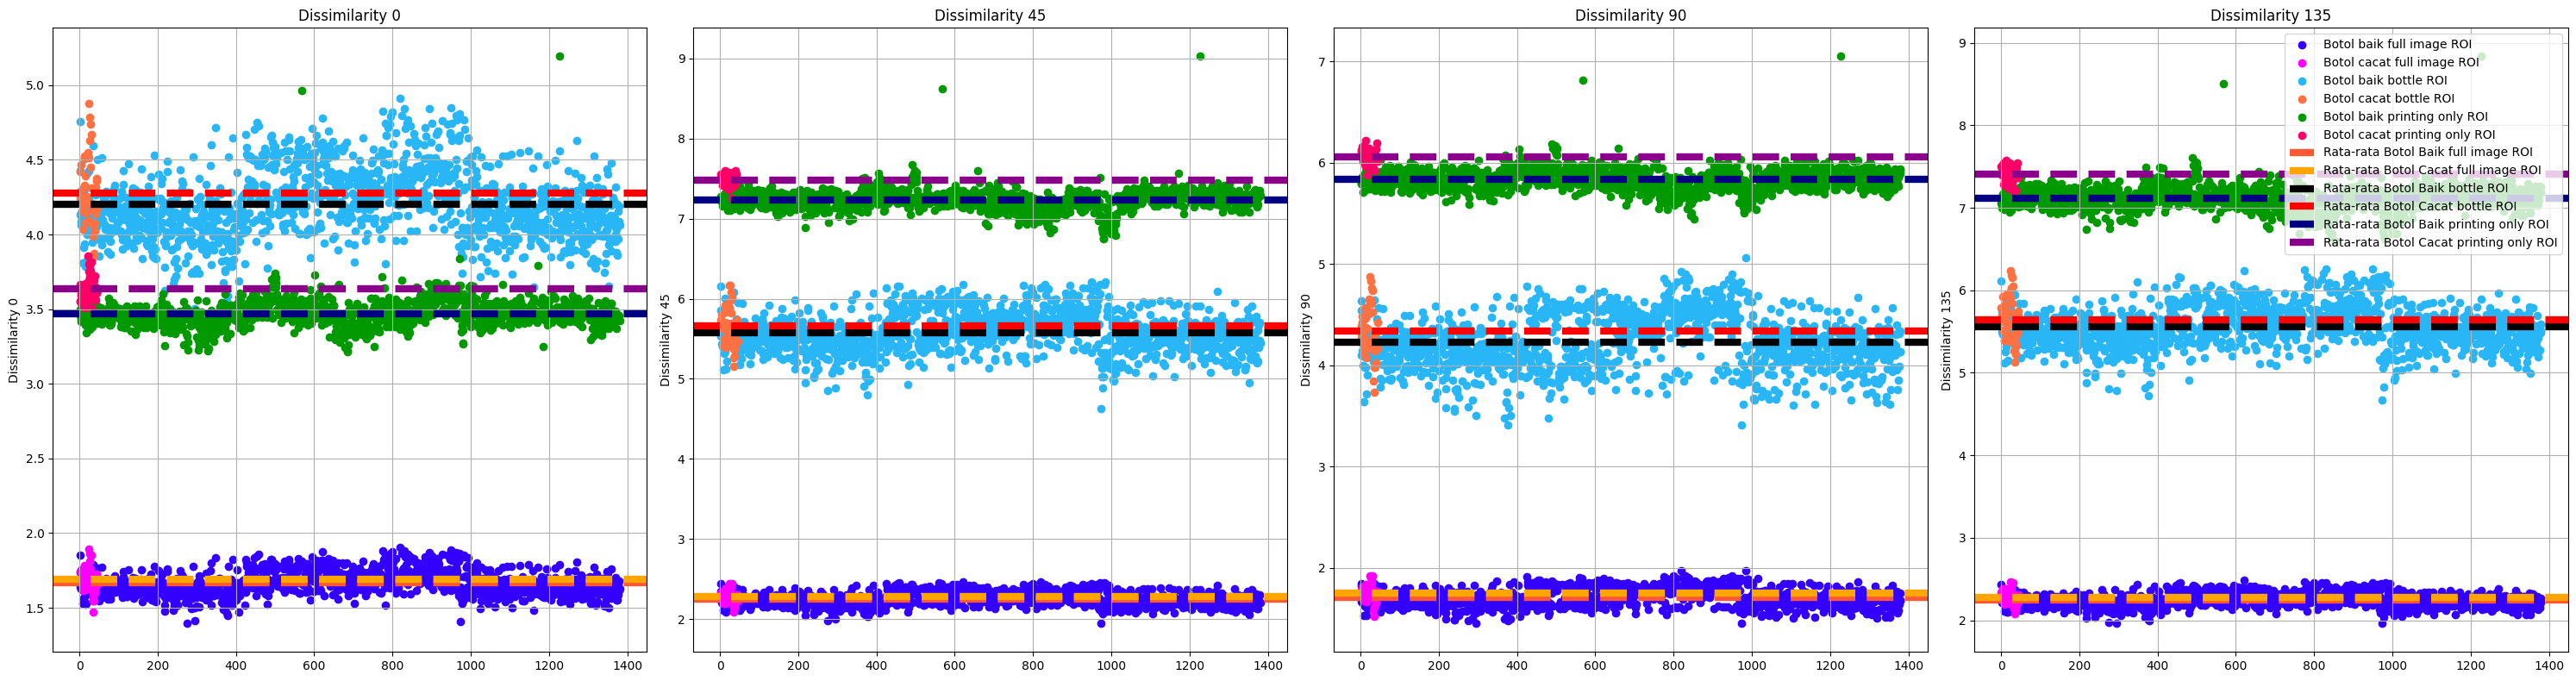

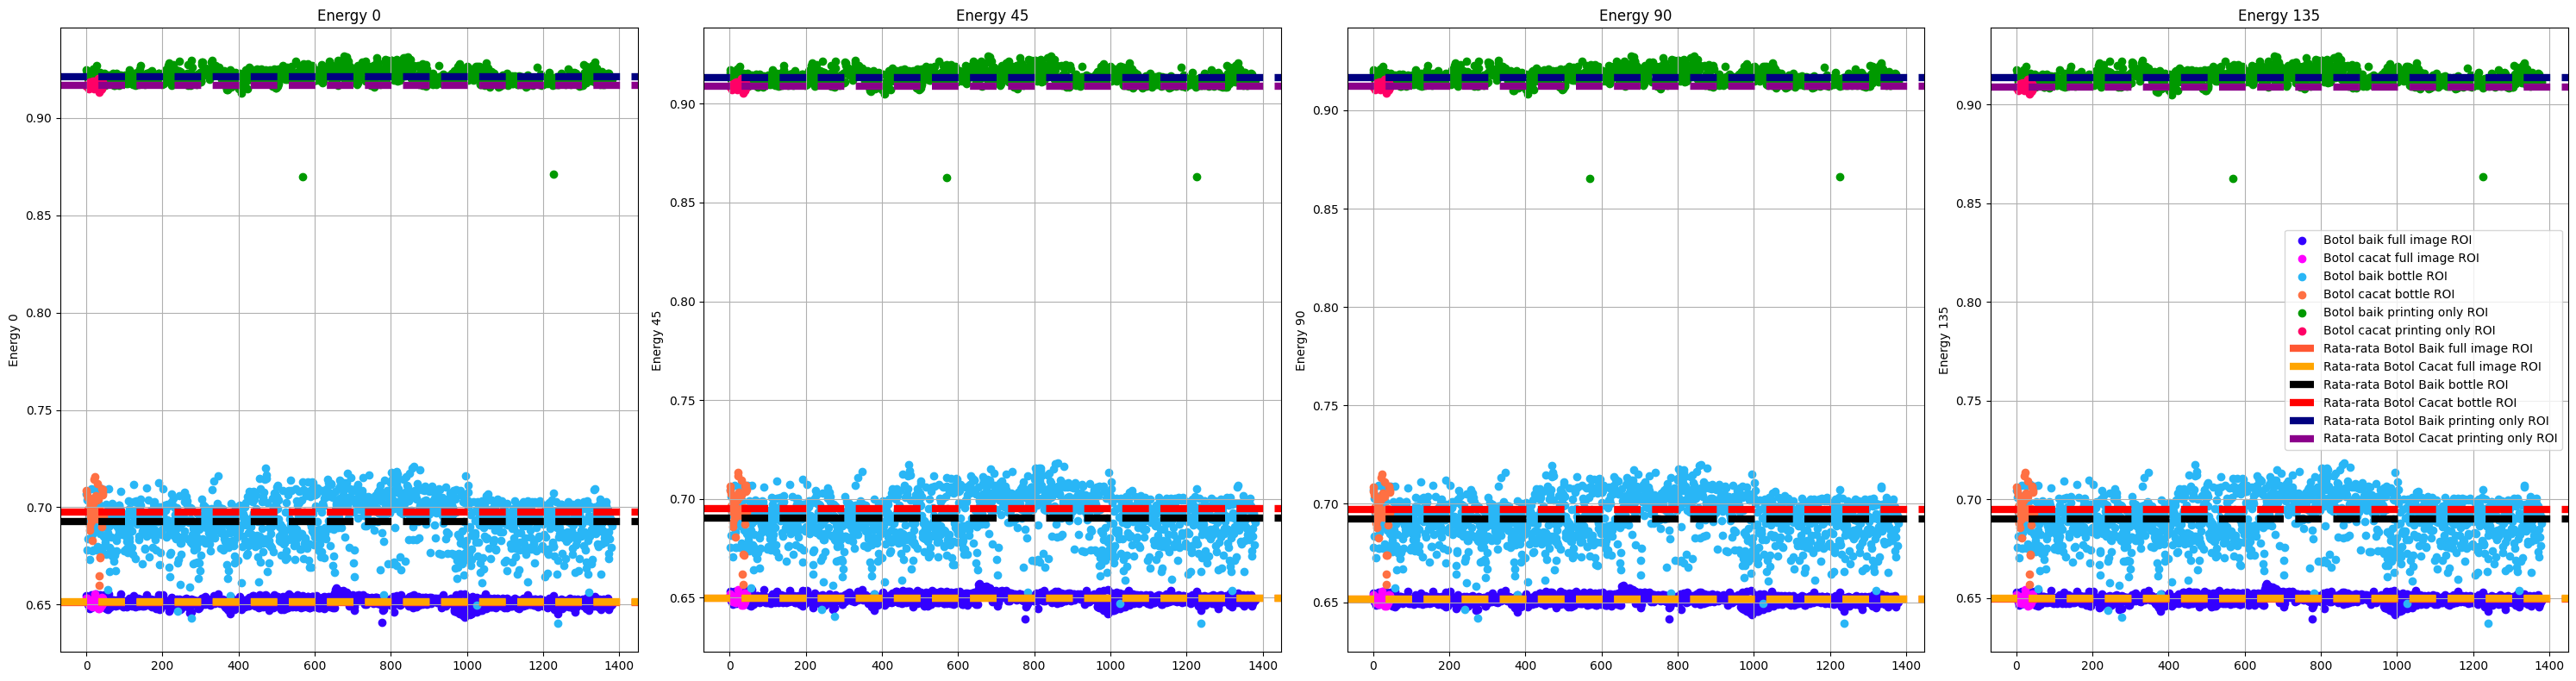

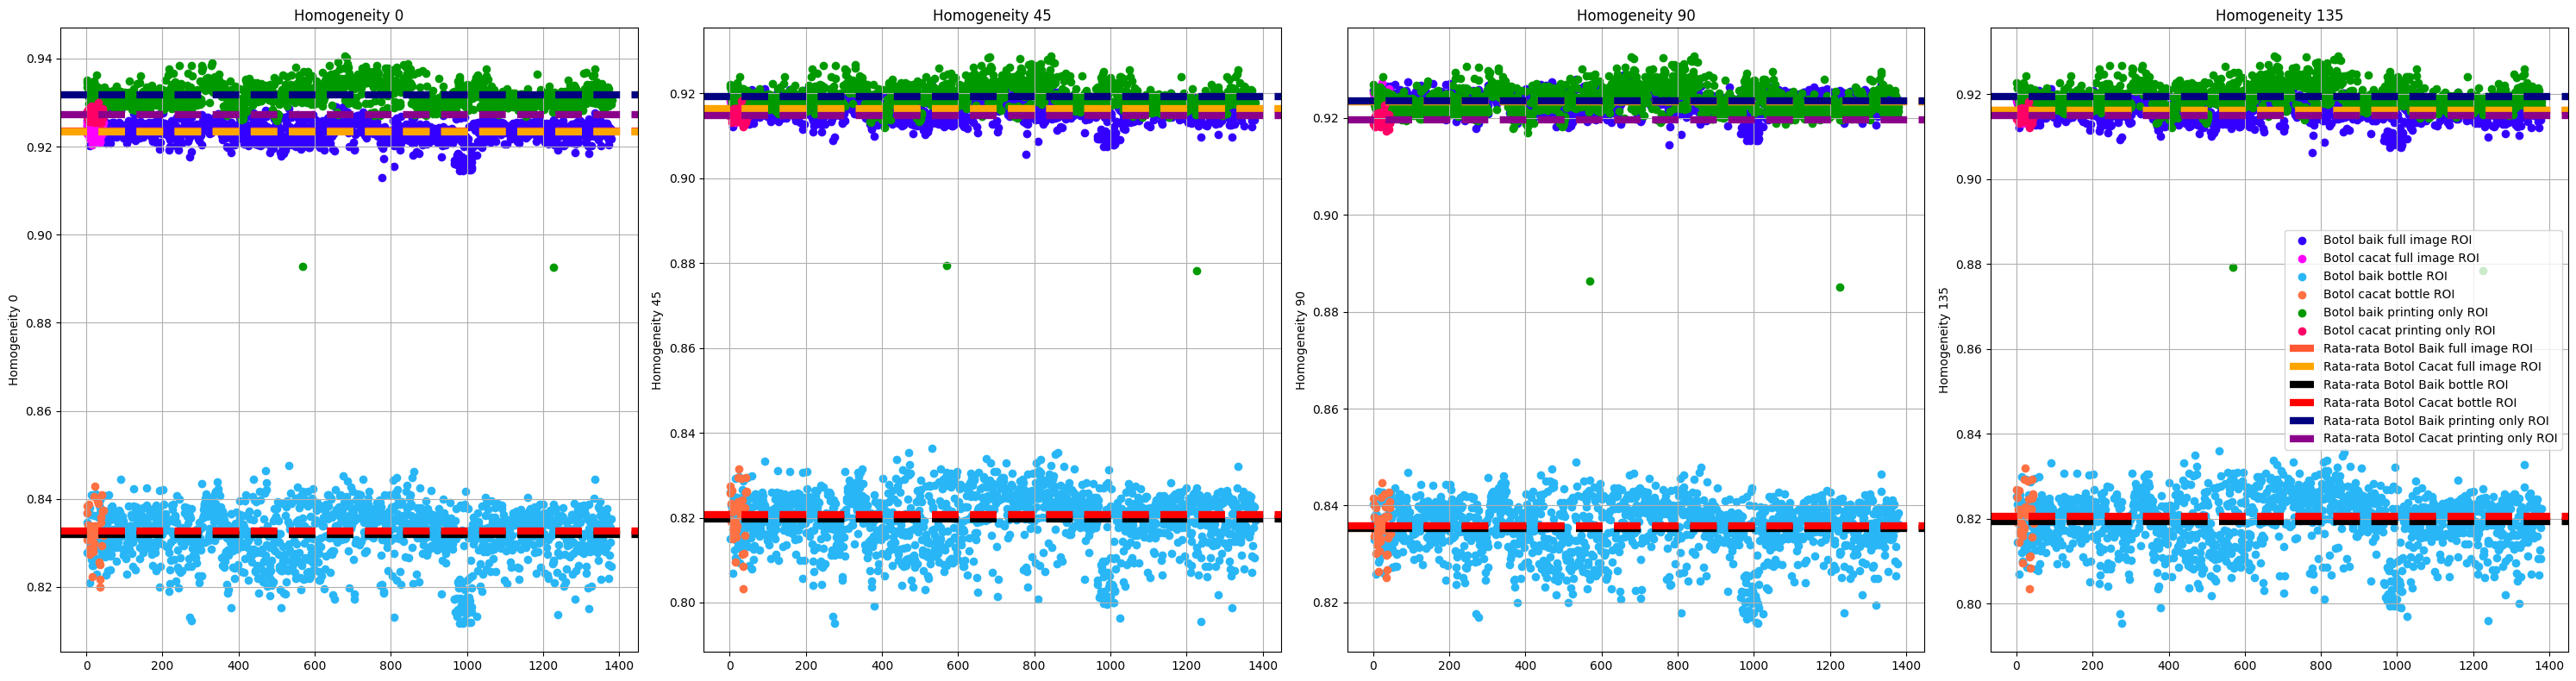

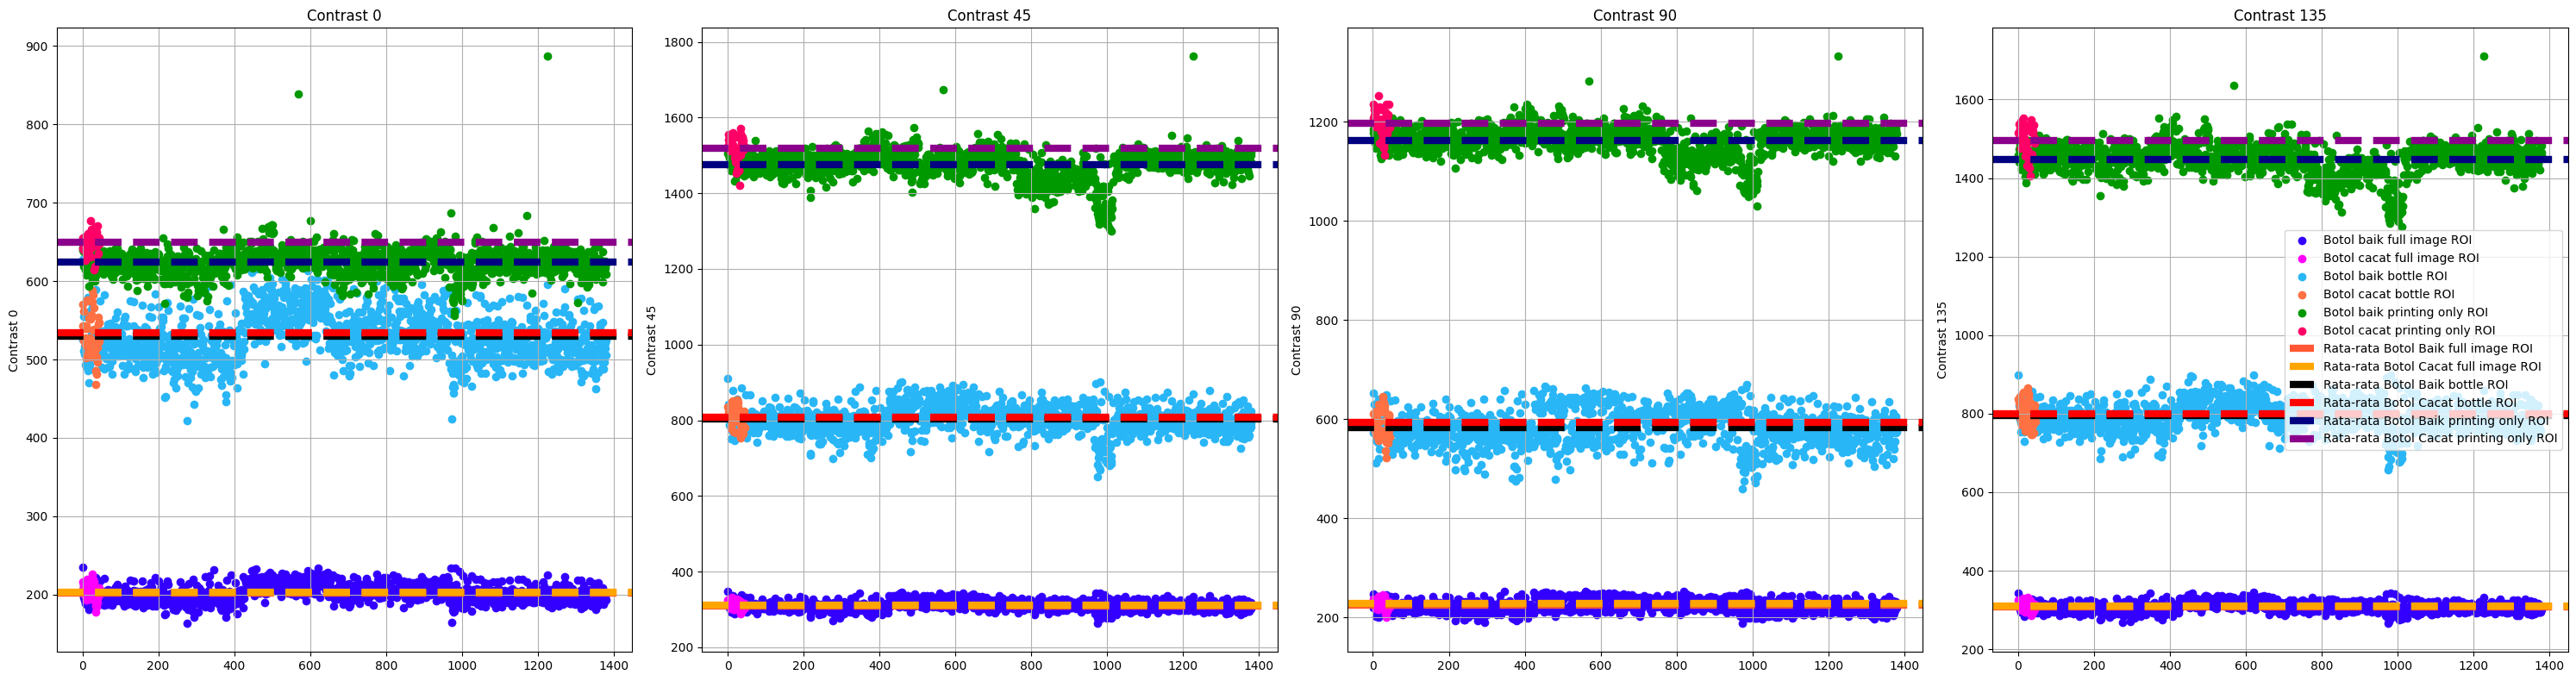

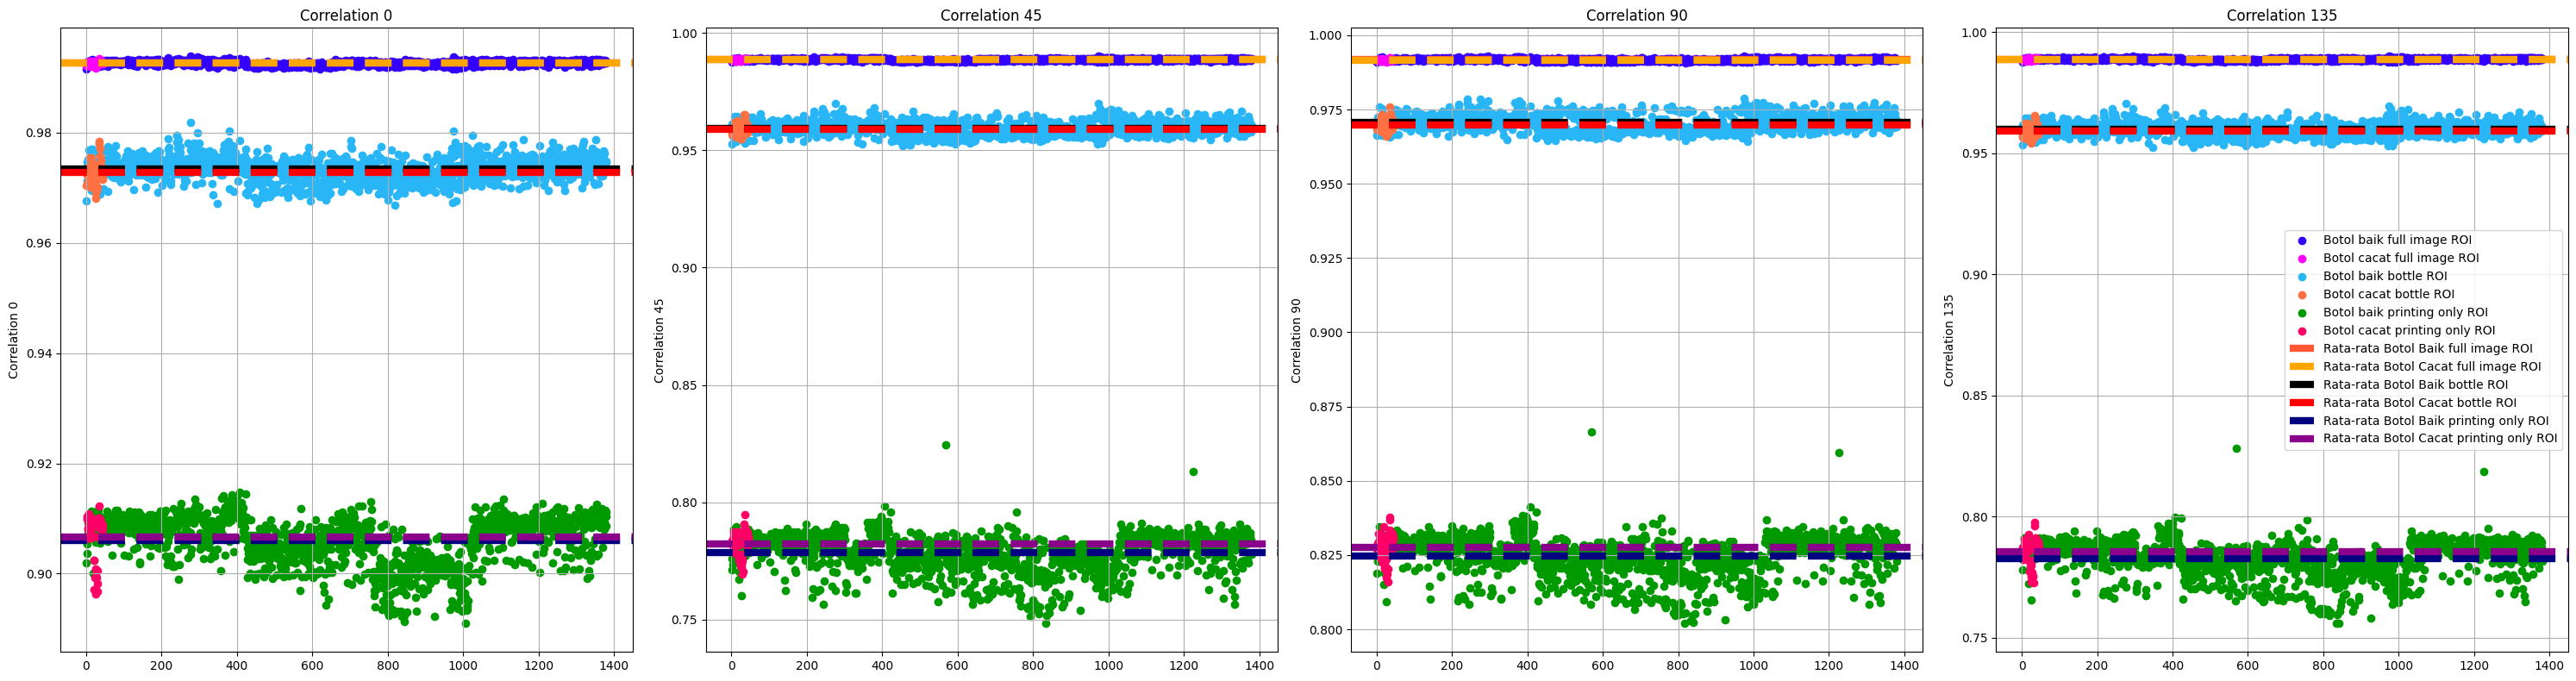

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
data = pd.read_csv('OZ_All file GLCM Analysis_All categories.csv')  # Gantilah 'nama_file.csv' dengan nama file CSV Anda

# Memeriksa struktur data
print(data.head())

data1 = data[data['category'] == 'good image']
data2 = data[data['category'] == 'reject image']
data3 = data[data['category'] == 'good bottle']
data4 = data[data['category'] == 'reject bottle']
data5 = data[data['category'] == 'good printing']
data6 = data[data['category'] == 'reject printing']

dissimilarity_columns = ['Dissimilarity 0', 'Dissimilarity 45', 'Dissimilarity 90', 'Dissimilarity 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(dissimilarity_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]
    property_values3 = data3[property_name]
    property_values4 = data4[property_name]
    property_values5 = data5[property_name]
    property_values6 = data6[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#3300FF', label='Botol baik full image ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF00FF', label='Botol cacat full image ROI')
    axs[i].scatter(range(1, len(property_values1) + 1), property_values3, color='#29B6F6', label='Botol baik bottle ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values4, color='#FF7043', label='Botol cacat bottle ROI')
    axs[i].scatter(range(1, len(property_values1) + 1), property_values5, color='#009900', label='Botol baik printing only ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values6, color='#FF0066', label='Botol cacat printing only ROI')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)
    mean_value3 = np.mean(property_values3)
    mean_value4 = np.mean(property_values4)
    mean_value5 = np.mean(property_values5)
    mean_value6 = np.mean(property_values6)

    axs[i].axhline(y=mean_value1, color='#FF5733', linestyle='--', linewidth=6, label='Rata-rata Botol Baik full image ROI')
    axs[i].axhline(y=mean_value2, color='orange', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat full image ROI')
    axs[i].axhline(y=mean_value3, color='black', linestyle='--', linewidth=6, label='Rata-rata Botol Baik bottle ROI')
    axs[i].axhline(y=mean_value4, color='red', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat bottle ROI')
    axs[i].axhline(y=mean_value5, color='navy', linestyle='--', linewidth=6, label='Rata-rata Botol Baik printing only ROI')
    axs[i].axhline(y=mean_value6, color='#8B008B', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat printing only ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.legend()
plt.show()

energy_columns = ['Energy 0', 'Energy 45', 'Energy 90', 'Energy 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(energy_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]
    property_values3 = data3[property_name]
    property_values4 = data4[property_name]
    property_values5 = data5[property_name]
    property_values6 = data6[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#3300FF', label='Botol baik full image ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF00FF', label='Botol cacat full image ROI')
    axs[i].scatter(range(1, len(property_values1) + 1), property_values3, color='#29B6F6', label='Botol baik bottle ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values4, color='#FF7043', label='Botol cacat bottle ROI')
    axs[i].scatter(range(1, len(property_values1) + 1), property_values5, color='#009900', label='Botol baik printing only ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values6, color='#FF0066', label='Botol cacat printing only ROI')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)
    mean_value3 = np.mean(property_values3)
    mean_value4 = np.mean(property_values4)
    mean_value5 = np.mean(property_values5)
    mean_value6 = np.mean(property_values6)

    axs[i].axhline(y=mean_value1, color='#FF5733', linestyle='--', linewidth=6, label='Rata-rata Botol Baik full image ROI')
    axs[i].axhline(y=mean_value2, color='orange', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat full image ROI')
    axs[i].axhline(y=mean_value3, color='black', linestyle='--', linewidth=6, label='Rata-rata Botol Baik bottle ROI')
    axs[i].axhline(y=mean_value4, color='red', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat bottle ROI')
    axs[i].axhline(y=mean_value5, color='navy', linestyle='--', linewidth=6, label='Rata-rata Botol Baik printing only ROI')
    axs[i].axhline(y=mean_value6, color='#8B008B', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat printing only ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.legend()
plt.show()

homogeneity_columns = ['Homogeneity 0', 'Homogeneity 45', 'Homogeneity 90', 'Homogeneity 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(homogeneity_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]
    property_values3 = data3[property_name]
    property_values4 = data4[property_name]
    property_values5 = data5[property_name]
    property_values6 = data6[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#3300FF', label='Botol baik full image ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF00FF', label='Botol cacat full image ROI')
    axs[i].scatter(range(1, len(property_values1) + 1), property_values3, color='#29B6F6', label='Botol baik bottle ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values4, color='#FF7043', label='Botol cacat bottle ROI')
    axs[i].scatter(range(1, len(property_values1) + 1), property_values5, color='#009900', label='Botol baik printing only ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values6, color='#FF0066', label='Botol cacat printing only ROI')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)
    mean_value3 = np.mean(property_values3)
    mean_value4 = np.mean(property_values4)
    mean_value5 = np.mean(property_values5)
    mean_value6 = np.mean(property_values6)

    axs[i].axhline(y=mean_value1, color='#FF5733', linestyle='--', linewidth=6, label='Rata-rata Botol Baik full image ROI')
    axs[i].axhline(y=mean_value2, color='orange', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat full image ROI')
    axs[i].axhline(y=mean_value3, color='black', linestyle='--', linewidth=6, label='Rata-rata Botol Baik bottle ROI')
    axs[i].axhline(y=mean_value4, color='red', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat bottle ROI')
    axs[i].axhline(y=mean_value5, color='navy', linestyle='--', linewidth=6, label='Rata-rata Botol Baik printing only ROI')
    axs[i].axhline(y=mean_value6, color='#8B008B', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat printing only ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.legend()
plt.show()

contrast_columns = ['Contrast 0', 'Contrast 45', 'Contrast 90', 'Contrast 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(contrast_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]
    property_values3 = data3[property_name]
    property_values4 = data4[property_name]
    property_values5 = data5[property_name]
    property_values6 = data6[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#3300FF', label='Botol baik full image ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF00FF', label='Botol cacat full image ROI')
    axs[i].scatter(range(1, len(property_values1) + 1), property_values3, color='#29B6F6', label='Botol baik bottle ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values4, color='#FF7043', label='Botol cacat bottle ROI')
    axs[i].scatter(range(1, len(property_values1) + 1), property_values5, color='#009900', label='Botol baik printing only ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values6, color='#FF0066', label='Botol cacat printing only ROI')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)
    mean_value3 = np.mean(property_values3)
    mean_value4 = np.mean(property_values4)
    mean_value5 = np.mean(property_values5)
    mean_value6 = np.mean(property_values6)

    axs[i].axhline(y=mean_value1, color='#FF5733', linestyle='--', linewidth=6, label='Rata-rata Botol Baik full image ROI')
    axs[i].axhline(y=mean_value2, color='orange', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat full image ROI')
    axs[i].axhline(y=mean_value3, color='black', linestyle='--', linewidth=6, label='Rata-rata Botol Baik bottle ROI')
    axs[i].axhline(y=mean_value4, color='red', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat bottle ROI')
    axs[i].axhline(y=mean_value5, color='navy', linestyle='--', linewidth=6, label='Rata-rata Botol Baik printing only ROI')
    axs[i].axhline(y=mean_value6, color='#8B008B', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat printing only ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.legend()
plt.show()

correlation_columns = ['Correlation 0', 'Correlation 45', 'Correlation 90', 'Correlation 135']

fig, axs = plt.subplots(1, 4, figsize=(30, 8))

for i, property_name in enumerate(correlation_columns):
    property_values1 = data1[property_name]
    property_values2 = data2[property_name]
    property_values3 = data3[property_name]
    property_values4 = data4[property_name]
    property_values5 = data5[property_name]
    property_values6 = data6[property_name]

    axs[i].scatter(range(1, len(property_values1) + 1), property_values1, color='#3300FF', label='Good Bottle full image ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values2, color='#FF00FF', label='Botol cacat full image ROI')
    axs[i].scatter(range(1, len(property_values1) + 1), property_values3, color='#29B6F6', label='Botol baik bottle ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values4, color='#FF7043', label='Botol cacat bottle ROI')
    axs[i].scatter(range(1, len(property_values1) + 1), property_values5, color='#009900', label='Botol baik printing only ROI')
    axs[i].scatter(range(1, len(property_values2) + 1), property_values6, color='#FF0066', label='Botol cacat printing only ROI')

    mean_value1 = np.mean(property_values1)
    mean_value2 = np.mean(property_values2)
    mean_value3 = np.mean(property_values3)
    mean_value4 = np.mean(property_values4)
    mean_value5 = np.mean(property_values5)
    mean_value6 = np.mean(property_values6)

    axs[i].axhline(y=mean_value1, color='#FF5733', linestyle='--', linewidth=6, label='Rata-rata Botol Baik full image ROI')
    axs[i].axhline(y=mean_value2, color='orange', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat full image ROI')
    axs[i].axhline(y=mean_value3, color='black', linestyle='--', linewidth=6, label='Rata-rata Botol Baik bottle ROI')
    axs[i].axhline(y=mean_value4, color='red', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat bottle ROI')
    axs[i].axhline(y=mean_value5, color='navy', linestyle='--', linewidth=6, label='Rata-rata Botol Baik printing only ROI')
    axs[i].axhline(y=mean_value6, color='#8B008B', linestyle='--', linewidth=6, label='Rata-rata Botol Cacat printing only ROI')

    axs[i].set_title(property_name)
    axs[i].set_ylabel(property_name)
    axs[i].grid(True)

plt.tight_layout()
plt.legend()
plt.show()

## Histogram and GLCM

In [43]:
#Get the Feature Data
def getDataFeature():
  dtFeature = FeaturesLabel()
  
  directory = "CAMERA 4_OZ/"
  subpath = "good/"
  newDirectory = directory + subpath
  number = 1
  category = "good"
  classData = 0

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        featureImage = ImageFeature(image)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")

  directory = "CAMERA 4_OZ/"
  subpath = "color tone/"
  newDirectory = directory + subpath
  number = 1
  category = "reject"
  classData = 1

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        featureImage = ImageFeature(image)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1

        print(f"{number} {nameFile}")
 
  return dtFeature

In [44]:
FeatureData = getDataFeature()
good_df = pd.DataFrame(FeatureData)
good_csv = 'OZ_All file GLCM and Histogram Analysis_Full Image ROI.csv'
good_df.to_csv(good_csv, index=False,header=False)

2 CAMERA 4_OZ/good/GOOD20230722185340798425.jpg
3 CAMERA 4_OZ/good/GOOD20230722185355551302.jpg
4 CAMERA 4_OZ/good/GOOD20230722185410555119.jpg
5 CAMERA 4_OZ/good/GOOD20230722185621223438.jpg
6 CAMERA 4_OZ/good/GOOD20230722185650056085.jpg
7 CAMERA 4_OZ/good/GOOD20230722185704156377.jpg
8 CAMERA 4_OZ/good/GOOD20230722185731451914.jpg
9 CAMERA 4_OZ/good/GOOD20230722185745770598.jpg
10 CAMERA 4_OZ/good/GOOD20230722185800800833.jpg
11 CAMERA 4_OZ/good/GOOD20230722185815380575.jpg
12 CAMERA 4_OZ/good/GOOD20230722185829544247.jpg
13 CAMERA 4_OZ/good/GOOD20230722185843275354.jpg
14 CAMERA 4_OZ/good/GOOD20230722185857366063.jpg
15 CAMERA 4_OZ/good/GOOD20230722185912941807.jpg
16 CAMERA 4_OZ/good/GOOD20230722190125279641.jpg
17 CAMERA 4_OZ/good/GOOD20230722190140423514.jpg
18 CAMERA 4_OZ/good/GOOD20230722190154715700.jpg
19 CAMERA 4_OZ/good/GOOD20230722190208672172.jpg
20 CAMERA 4_OZ/good/GOOD20230722190224048817.jpg
21 CAMERA 4_OZ/good/GOOD20230722190239235133.jpg
22 CAMERA 4_OZ/good/GOOD2023

In [45]:
#Get the Feature Data
def getDataFeature():
  dtFeature = FeaturesLabel()
  
  directory = "CAMERA 4_OZ/"
  subpath = "good/"
  newDirectory = directory + subpath
  number = 1
  category = "good"
  classData = 0

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_bottle.jpg')
        featureImage = ImageFeature(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")

  directory = "CAMERA 4_OZ/"
  subpath = "color tone/"
  newDirectory = directory + subpath
  number = 1
  category = "reject"
  classData = 1

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_bottle.jpg')
        featureImage = ImageFeature(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1

        print(f"{number} {nameFile}")
 
  return dtFeature

In [46]:
FeatureData = getDataFeature()
good_df = pd.DataFrame(FeatureData)
good_csv = 'OZ_All file GLCM and Histogram Analysis_Bottle ROI.csv'
good_df.to_csv(good_csv, index=False,header=False)

2 CAMERA 4_OZ/good/GOOD20230722185340798425.jpg
3 CAMERA 4_OZ/good/GOOD20230722185355551302.jpg
4 CAMERA 4_OZ/good/GOOD20230722185410555119.jpg
5 CAMERA 4_OZ/good/GOOD20230722185621223438.jpg
6 CAMERA 4_OZ/good/GOOD20230722185650056085.jpg
7 CAMERA 4_OZ/good/GOOD20230722185704156377.jpg
8 CAMERA 4_OZ/good/GOOD20230722185731451914.jpg
9 CAMERA 4_OZ/good/GOOD20230722185745770598.jpg
10 CAMERA 4_OZ/good/GOOD20230722185800800833.jpg
11 CAMERA 4_OZ/good/GOOD20230722185815380575.jpg
12 CAMERA 4_OZ/good/GOOD20230722185829544247.jpg
13 CAMERA 4_OZ/good/GOOD20230722185843275354.jpg
14 CAMERA 4_OZ/good/GOOD20230722185857366063.jpg
15 CAMERA 4_OZ/good/GOOD20230722185912941807.jpg
16 CAMERA 4_OZ/good/GOOD20230722190125279641.jpg
17 CAMERA 4_OZ/good/GOOD20230722190140423514.jpg
18 CAMERA 4_OZ/good/GOOD20230722190154715700.jpg
19 CAMERA 4_OZ/good/GOOD20230722190208672172.jpg
20 CAMERA 4_OZ/good/GOOD20230722190224048817.jpg
21 CAMERA 4_OZ/good/GOOD20230722190239235133.jpg
22 CAMERA 4_OZ/good/GOOD2023

In [47]:
#Get the Feature Data
def getDataFeature():
  dtFeature = FeaturesLabel()
  
  directory = "CAMERA 4_OZ/"
  subpath = "good/"
  newDirectory = directory + subpath
  number = 1
  category = "good"
  classData = 0

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_fullprint.jpg')
        featureImage = ImageFeature(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1 

        print(f"{number} {nameFile}")

  directory = "CAMERA 4_OZ/"
  subpath = "color tone/"
  newDirectory = directory + subpath
  number = 1
  category = "reject"
  classData = 1

  
  for path in os.listdir(newDirectory):
    # check if current path is a file
    if os.path.isfile(os.path.join(newDirectory, path)):
        T1 = time.monotonic()
        nameFile = os.path.join(newDirectory, path)
        
        image = cv2.imread(nameFile, cv2.IMREAD_GRAYSCALE)
        templateMatched = TemplateMatching(image, template='template/OZ_fullprint.jpg')
        featureImage = ImageFeature(templateMatched)
        
        T2 = time.monotonic()
        time_diff = T2 - T1  
        initDTFeature = np.array([number, nameFile , category, classData, time_diff])
        
        if len(featureImage) > 0 :
            featureData = np.append(initDTFeature, featureImage,axis = 0)
            dtFeature = np.append(dtFeature, np.array([featureData]), axis=0) 

        number += 1

        print(f"{number} {nameFile}")
 
  return dtFeature

In [48]:
FeatureData = getDataFeature()
good_df = pd.DataFrame(FeatureData)
good_csv = 'OZ_All file GLCM and Histogram Analysis_Fullprint ROI.csv'
good_df.to_csv(good_csv, index=False,header=False)

2 CAMERA 4_OZ/good/GOOD20230722185340798425.jpg
3 CAMERA 4_OZ/good/GOOD20230722185355551302.jpg
4 CAMERA 4_OZ/good/GOOD20230722185410555119.jpg
5 CAMERA 4_OZ/good/GOOD20230722185621223438.jpg
6 CAMERA 4_OZ/good/GOOD20230722185650056085.jpg
7 CAMERA 4_OZ/good/GOOD20230722185704156377.jpg
8 CAMERA 4_OZ/good/GOOD20230722185731451914.jpg
9 CAMERA 4_OZ/good/GOOD20230722185745770598.jpg
10 CAMERA 4_OZ/good/GOOD20230722185800800833.jpg
11 CAMERA 4_OZ/good/GOOD20230722185815380575.jpg
12 CAMERA 4_OZ/good/GOOD20230722185829544247.jpg
13 CAMERA 4_OZ/good/GOOD20230722185843275354.jpg
14 CAMERA 4_OZ/good/GOOD20230722185857366063.jpg
15 CAMERA 4_OZ/good/GOOD20230722185912941807.jpg
16 CAMERA 4_OZ/good/GOOD20230722190125279641.jpg
17 CAMERA 4_OZ/good/GOOD20230722190140423514.jpg
18 CAMERA 4_OZ/good/GOOD20230722190154715700.jpg
19 CAMERA 4_OZ/good/GOOD20230722190208672172.jpg
20 CAMERA 4_OZ/good/GOOD20230722190224048817.jpg
21 CAMERA 4_OZ/good/GOOD20230722190239235133.jpg
22 CAMERA 4_OZ/good/GOOD2023